# **Grupo 5**

### Juan Carlos Zuñiga M, Julián Morales, Leonardo Agudelo y Maria Camila Diaz

In [11]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

In [ ]:

# Cargar el archivo Excel

#df = pd.read_excel("./Data/Ventas_portal_data_bruta.xlsx")
#df = pd.read_excel('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/Ventas_portal_data_bruta.xlsx')

# Mostrar las dimensiones del DataFrame (filas, columnas)
#print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
#pd.set_option('display.max_columns', None) # Mostrar todas las columnas

(22393, 34)


## Descripcion:

La organización necesita predecir qué tipo de planes de internet y en qué rango de precios serán más contratados en los próximos 3 meses, considerando el impacto del estrato socioeconómico en la decisión de compra.

Actualmente, no existe un modelo predictivo que permita anticipar la demanda según el precio y el estrato, lo que podría generar una oferta desalineada con las necesidades del mercado, afectando la rentabilidad, planificación comercial y fidelización de clientes.

# PREGUNTA SMART

## **¿Qué tipo de planes de internet y en qué rango de precios tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?**


* **Específica**:   Define los tipo de planes, en Cali, segmentado por estrato, y con histórico de ventas, rechazados y características.

* **Medible**:	Se puede medir con frecuencias, ordendes creadas/rechazo, tendencias históricas y modelos predictivos.

* **Alcanzable**:	cuenta con un histórico de datos sobre ventas, rechazos y características de los clientes, lo que permite aplicar técnicas de análisis exploratorio y modelos predictivos. Con herramientas como Python, pandas y scikit-learn facilitan el procesamiento de la información y la construcción de modelos de predicción para estimar la probabilidad de contratación de cada tipo de plan.

* **Relevante**:	Permite tomar decisiones estratégicas: diseñar planes por segmento, ajustar campañas y anticipar demanda.

* **Temporal**:	Define un horizonte de análisis a "los próximos meses", lo que permite actualizaciones periódicas y adaptación al mercado.

***

#  Analisis Exploratorio

### Descripcion de los Datos

In [12]:
# Volvemos a cargar el dataset con los datos originales

df = pd.read_excel("./Data/Ventas_portal_data_bruta.xlsx")
#df = pd.read_excel('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/Ventas_portal_data_bruta.xlsx')

In [13]:
df.head()

,id,date_creation,is_actived,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,...,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
0,33,2022-12-21 19:02:58.730,Orden creada,NaN,NaN,H,1,25,Cali,Residencial,...,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
1,36,2022-12-22 14:27:15.660,Orden creada,NaN,NaN,M,2,36,Cali,Residencial,...,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
2,38,2022-12-26 14:46:43.920,Orden creada,NaN,NaN,H,1,20,Cali,Residencial,...,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
3,40,2023-01-06 20:32:13.890,Rechazado,Otra,NaN,H,1,25,Cali,Residencial,...,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
4,42,2023-01-13 17:11:42.370,Rechazado,Otra,NaN,H,1,35,Jamundi,Residencial,...,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN


# EDA - Analisis Exploratorio

## Analisis de Estructura

In [5]:
# Mostrar el nuevo DataFrame
df.describe(include='all')

,id,date_creation,is_actived,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,type_service,estrato,plan,id_plan,id_plan_open,price_plan,user_creation_id,cdo,contract,package,plan_type,zone,nombre_zone,type_ide,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
count,22393.000000,22393,22393,2959,329.000000,22393,22393.000000,22393.000000,22393,22393,22393.000000,22393.000000,22393,22393.000000,22393.000000,22385.000000,22393.000000,22393,1.935200e+04,22393.000000,22393,22393.000000,22236,22393.000000,22393,1606,1606,22393,1606,21816.000000,21816,21816.000000,21816,21816.000000
unique,NaN,NaN,7,13,NaN,2,NaN,NaN,5,5,NaN,NaN,20,NaN,NaN,NaN,NaN,11064,NaN,NaN,3,NaN,4,NaN,5,4,32,2,NaN,NaN,386,NaN,38,NaN
top,NaN,NaN,Orden creada,Deuda,NaN,H,NaN,NaN,Cali,Residencial,NaN,NaN,DPL BA 250MB+VOZ ILIM-24,NaN,NaN,NaN,NaN,0005S2313,NaN,NaN,Dupla,NaN,O,NaN,CC,Anulacion,Cliente en cartera,NO,NaN,NaN,Manuela Beltran,NaN,Comuna 14,NaN
freq,NaN,NaN,19253,824,NaN,14045,NaN,NaN,21226,22220,NaN,NaN,4362,NaN,NaN,NaN,NaN,32,NaN,NaN,18019,NaN,6933,NaN,22276,638,500,20787,NaN,NaN,788,NaN,2579,NaN
mean,11375.507659,2024-06-19 02:37:08.891686912,NaN,NaN,25.328267,NaN,1.372795,41.863618,NaN,NaN,45.010807,2.650426,NaN,1270.233287,1307.136561,69335.397766,14193.391953,NaN,4.566018e+07,0.025633,NaN,2.548028,NaN,2.019158,NaN,NaN,NaN,NaN,2024-08-28 03:22:09.777085952,207.947149,NaN,14.356940,NaN,1.058352
min,33.000000,2022-12-21 19:02:58.730000,NaN,NaN,17.000000,NaN,1.000000,18.000000,NaN,NaN,41.000000,1.000000,NaN,1239.000000,0.000000,41576.000000,1.000000,NaN,1.491710e+05,0.000000,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2023-06-01 10:30:41,0.000000,NaN,0.000000,NaN,0.000000
25%,5757.000000,2024-03-20 15:33:51.670000128,NaN,NaN,25.000000,NaN,1.000000,30.000000,NaN,NaN,45.000000,2.000000,NaN,1260.000000,1296.000000,61965.000000,8228.000000,NaN,4.681022e+07,0.000000,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-05-23 16:35:35.500000,115.000000,NaN,8.000000,NaN,1.000000
50%,11377.000000,2024-06-18 13:50:53.380000,NaN,NaN,25.000000,NaN,1.000000,42.000000,NaN,NaN,45.000000,2.000000,NaN,1272.000000,1309.000000,66399.000000,14238.000000,NaN,4.681716e+07,0.000000,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-09-30 22:31:25,210.000000,NaN,14.000000,NaN,1.000000
75%,16993.000000,2024-09-25 17:27:05.640000,NaN,NaN,26.000000,NaN,2.000000,53.000000,NaN,NaN,45.000000,3.000000,NaN,1280.000000,1318.000000,70549.000000,20350.000000,NaN,4.682400e+07,0.000000,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-12-12 13:02:31.249999872,260.000000,NaN,18.000000,NaN,1.000000
max,22627.000000,2025-03-01 15:17:29.170000,NaN,NaN,27.000000,NaN,2.000000,66.000000,NaN,NaN,48.000000,6.000000,NaN,1282.000000,1320.000000,149999.000000,26748.000000,NaN,4.722259e+07,1.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,2025-02-28 16:57:52,867.000000,NaN,46.000000,NaN,4.000000


In [6]:
# 1. ANÁLISIS DE ESTRUCTURA DEL DATAFRAME
estructura_df = {
    "Número de Filas": df.shape[0],
    "Número de Columnas": df.shape[1],
    "Tipos de Datos": df.dtypes.value_counts().to_dict(),
    "Valores Nulos por Columna": df.isnull().sum().to_dict()
}

estructura_df

{'Número de Filas': 22393,
 'Número de Columnas': 34,
 'Tipos de Datos': {dtype('O'): 15,
  dtype('int64'): 11,
  dtype('float64'): 6,
  dtype('<M8[ns]'): 2},
 'Valores Nulos por Columna': {'id': 0,
  'date_creation': 0,
  'is_actived': 0,
  'motivo_is_actived': 19434,
  'causal_anulacion_id': 22064,
  'Genero': 0,
  'id_genero': 0,
  'Edad': 0,
  'city_owner': 0,
  'category': 0,
  'type_service': 0,
  'estrato': 0,
  'plan': 0,
  'id_plan': 0,
  'id_plan_open': 0,
  'price_plan': 8,
  'user_creation_id': 0,
  'cdo': 0,
  'contract': 3041,
  'package': 0,
  'plan_type': 0,
  'zone': 0,
  'nombre_zone': 157,
  'type_ide': 0,
  'nombre_type_ide': 0,
  'ventas_Retiradas_causales': 20787,
  'ventas_Retiradas_nombre_causal': 20787,
  'Retiro': 0,
  'fecha_retiro': 20787,
  'id_barrios': 577,
  'Barrios': 577,
  'id_comuna': 577,
  'Comuna': 577,
  'barrios_id_ciudades': 577}}

>Variables Demográficas

- Estrato socioeconómico (estrato) → Es clave porque los ingresos pueden determinar qué planes son más accesibles para cada segmento.

- Edad (Edad) → Puede influir en la preferencia de contratación (jóvenes vs. adultos mayores).

- Género (Genero) → Aunque no siempre es determinante, podría haber tendencias de contratación según género.
- Comuna (Comuna) → La ubicación geográfica puede influir en la disponibilidad de ciertos planes y la demanda.

> Variables de Producto

- Tipo de Plan (plan) → DPL, Internet, Triple Play (TV, Teléfono e Internet), etc.
- Precio del Plan (price_plan) → Los clientes pueden preferir más velocidad por un precio determinado.
- Duración del Contrato (duracion_contrato) → Se puede determinar con el tiempo de creacion y la fecha de retiro

> Variables Temporales

- Mes de la Compra (mes) → Analizar estacionalidad en las contrataciones.
- Día de la Semana (dia_semana_num) → Puede revelar si hay días con más contrataciones.
- Tendencias Históricas → Se pueden analizar cambios en la demanda a lo largo del tiempo.

> Variables de Rechazo y Retención

- Motivo de Rechazo (caudal_retiro_is_Anulacion, caudal_retiro_is_Cartera, etc.) → Identificar por qué ciertos clientes no completan la compra.
- Planes Cancelados (Retiro) → Evaluar qué planes tienen una tasa de cancelación alta.
- Segmentación por ciudad (city_is_Cali, city_is_Palmira, etc.) → Si hay clientes en diferentes ciudades.

## Diccionario de Datos:

| Variable                        | Descripción                                      |
|---------------------------------|--------------------------------------------------|
| `id`                            | Identificador único                              |
| `date_creation`                 | Fecha de creación de la solicitud                |
| `is_actived`                    | Estado de la solicitud                           |
| `motivo_is_actived`             | Motivo de rechazo o Anulación                    |
| `causal_anulacion_id`           | Id de causal de rechazo o anulación              |
| `Genero`                        | Género                                           |
| `id_genero`                     | Id de género                                     |
| `Edad`                          | Edad                                             |
| `city_owner`                    | Ciudad de residencia                             |
| `category`                      | Segmento del cliente: Residencial, Convenio o Empresarial |
| `type_service`                  | Id de segmento del cliente: Residencial, Convenio o Empresarial |
| `estrato`                       | Estrato                                          |
| `plan`                          | Nombre del plan                                  |
| `id_plan`                       | Id del plan                                      |
| `id_plan_open`                  | Id 2 del plan: esta variable tiene colinealidad con id_plan |
| `price_plan`                    | Precio del plan                                  |
| `user_creation_id`              | Id de usuario creador                            |
| `cdo`                           | Código de la CDO Caja de distribución óptica     |
| `contract`                      | Número de contrato                               |
| `package`                       | Solicitud de empaquetamiento                     |
| `plan_type`                     | Tipo de plan (Internet, Dupla, Triple)           |
| `nombre_type_ide`               | Tipo de documento de identidad                   |
| `ventas_Retiradas_causales`     | Causales de retiro                               |
| `ventas_Retiradas_nombre_causal`| Nombre de la causal de retiro                    |
| `Retiro`                        | Cliente retirado                                 |
| `fecha_retiro`                  | Fecha de retiro                                  |
| `id_barrios`                    | Id de barrio                                     |
| `Barrios`                       | Barrio                                           |
| `id_comuna`                     | Id de comuna                                     |
| `Comuna`                        | Comuna                                           |
| `barrios_id_ciudades`           | Id de barrio     

In [7]:
#Identificar Valores Duplicados

df.duplicated().sum()

0

In [8]:
# Cantidad de valores nulos por columna
valores_nulos = df.isna().sum()

# Porcentaje de valores nulos por columna
porcentaje_nulos = (df.isna().sum() / len(df)) * 100

# Crear un DataFrame con los resultados
nulos_df = pd.DataFrame({
    'Cantidad de Nulos': valores_nulos,
    'Porcentaje de Nulos (%)': porcentaje_nulos
})

nulos_df

,Cantidad de Nulos,Porcentaje de Nulos (%)
id,0,0.000000
date_creation,0,0.000000
is_actived,0,0.000000
motivo_is_actived,19434,86.786049
causal_anulacion_id,22064,98.530791
Genero,0,0.000000
id_genero,0,0.000000
Edad,0,0.000000
city_owner,0,0.000000
category,0,0.000000


{'Número de Filas': 22393, 'Número de Columnas': 34, 'Tipos de Datos': {dtype('O'): 15, dtype('int64'): 11, dtype('float64'): 6, dtype('<M8[ns]'): 2}, 'Valores Nulos por Columna': {'id': 0, 'date_creation': 0, 'is_actived': 0, 'motivo_is_actived': 19434, 'causal_anulacion_id': 22064, 'Genero': 0, 'id_genero': 0, 'Edad': 0, 'city_owner': 0, 'category': 0, 'type_service': 0, 'estrato': 0, 'plan': 0, 'id_plan': 0, 'id_plan_open': 0, 'price_plan': 8, 'user_creation_id': 0, 'cdo': 0, 'contract': 3041, 'package': 0, 'plan_type': 0, 'zone': 0, 'nombre_zone': 157, 'type_ide': 0, 'nombre_type_ide': 0, 'ventas_Retiradas_causales': 20787, 'ventas_Retiradas_nombre_causal': 20787, 'Retiro': 0, 'fecha_retiro': 20787, 'id_barrios': 577, 'Barrios': 577, 'id_comuna': 577, 'Comuna': 577, 'barrios_id_ciudades': 577}}


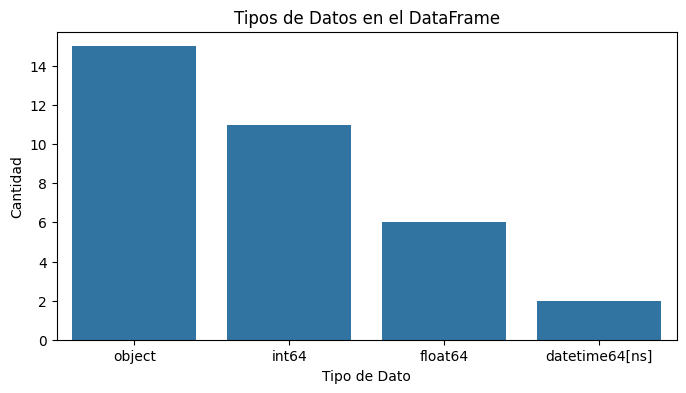

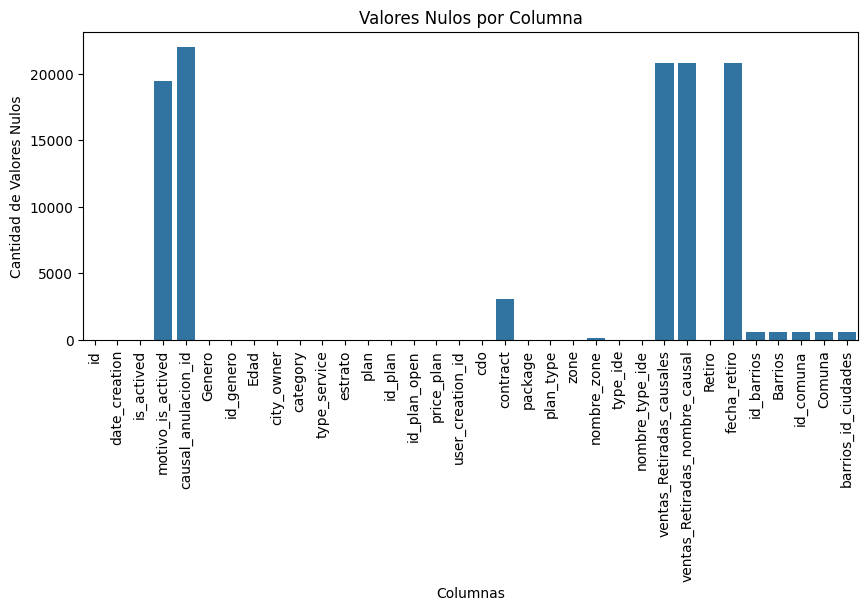

In [9]:
# 1. ANÁLISIS DE ESTRUCTURA DEL DATAFRAME
estructura_df = {
    "Número de Filas": df.shape[0],
    "Número de Columnas": df.shape[1],
    "Tipos de Datos": df.dtypes.value_counts().to_dict(),
    "Valores Nulos por Columna": df.isnull().sum().to_dict()
}

# Mostrar la estructura del DataFrame
print(estructura_df)

# Gráfico de Tipos de Datos
plt.figure(figsize=(8, 4))
sns.barplot(x=list(estructura_df["Tipos de Datos"].keys()), y=list(estructura_df["Tipos de Datos"].values()))
plt.title('Tipos de Datos en el DataFrame')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de Valores Nulos por Columna
plt.figure(figsize=(10, 4))
sns.barplot(x=list(estructura_df["Valores Nulos por Columna"].keys()), y=list(estructura_df["Valores Nulos por Columna"].values()))
plt.title('Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)
plt.show()

### Análisis de Estructura del Dataset

El dataset contiene 22,393 registros y 34 columnas, representando información sobre la contratación de planes de internet en Cali. Las variables están compuestas por 15 categóricas, 11 numéricas y 6 de tipo flotante, además de 2 variables de fecha.

### Valores Nulos

Se identificó la presencia de valores nulos en varias columnas, destacándose:

- motivo_is_actived con 19,434 valores nulos (86.78%).
- causal_anulacion_id con 22,064 valores nulos (98.53%).
- ventas_Retiradas_causales y ventas_Retiradas_nombre_causal con 20,787 valores nulos (92.82%).
- contract con 3,041 valores nulos (13.58%).
- Datos geográficos: id_barrios, Barrios, id_comuna, Comuna y barrios_id_ciudades presentan 577 valores nulos (2.57%).
- price_plan presenta 8 valores nulos, lo que debe revisarse ya que es una variable clave para el análisis.

### Tipos de Datos
Los datos están estructurados en diferentes tipos:

- Variables categóricas (15) como is_actived, Genero, category, plan, Comuna, etc.
- Variables numéricas enteras (11) como Edad, estrato, id_plan, zone, entre otras.
- Variables numéricas flotantes (6) como causal_anulacion_id, contract, id_barrios, id_comuna.
- Variables de fecha (2) como date_creation y fecha_retiro, las cuales pueden utilizarse para análisis temporal.

### Duplicados

- Se verificó que no existen registros duplicados, lo que indica que cada fila representa una transacción única.

### Posibles Inconsistencias

- Es necesario la normalización en variables categóricas para evitar duplicados causados por errores en escritura.
- La variable is_actived contiene diferentes estados de las órdenes, por lo que se debe analizar la cantidad de valores únicos y su impacto en la predicción de contrataciones.

### Consideraciones para la Modelización

- Codificación de variables categóricas: Se puede aplicar Label Encoding para variables ordinales como estrato y One-Hot Encoding para plan, Comuna y city_owner.
- Manejo de valores nulos: Las columnas con más del 90% de valores nulos pueden ser descartadas si no aportan información relevante al modelo.
- Transformación de variables de fecha: date_creation puede ser utilizada para identificar tendencias temporales.

## Analisis de Varaibles Categoricas

In [10]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Mostrar el número de columnas categóricas
print(f"Número de variables categóricas: {len(categorical_columns)}")

# Mostrar los nombres de las columnas categóricas
print("Variables categóricas:")
print(categorical_columns.to_list())

Número de variables categóricas: 15
Variables categóricas:
['is_actived', 'motivo_is_actived', 'Genero', 'city_owner', 'category', 'plan', 'cdo', 'plan_type', 'nombre_zone', 'nombre_type_ide', 'ventas_Retiradas_causales', 'ventas_Retiradas_nombre_causal', 'Retiro', 'Barrios', 'Comuna']


In [11]:
# Contar la cantidad de registros por categoría en variables principales
categorical_columns = ['is_actived', 'motivo_is_actived', 'Genero', 'city_owner', 'category', 'plan', 'cdo', 'plan_type', 'nombre_zone', 'nombre_type_ide', 'ventas_Retiradas_causales', 'ventas_Retiradas_nombre_causal', 'Retiro', 'Barrios', 'Comuna']
for col in categorical_columns:
    print(f"\nDistribución de {col}:\n", df[col].value_counts(normalize=True) * 100)


Distribución de is_actived:
 is_actived
Orden creada    85.977761
Rechazado       11.744742
Anulado          1.469209
Por Firmar       0.745769
Firmado          0.044657
Por Agendar      0.008931
Recibida         0.008931
Name: proportion, dtype: float64

Distribución de motivo_is_actived:
 motivo_is_actived
Deuda                        27.847246
Tiempo                       22.440014
Otra                         20.648868
Informacion Inconsistente    11.355188
Existe solicitud              8.077053
Orden Creada                  5.914160
Documentos                    2.973978
Empresarial                   0.270362
No interesado                 0.236566
Otro canal                    0.101386
Atendido                      0.067590
En proceso                    0.033795
TV                            0.033795
Name: proportion, dtype: float64

Distribución de Genero:
 Genero
H    62.720493
M    37.279507
Name: proportion, dtype: float64

Distribución de city_owner:
 city_owner
Cali        

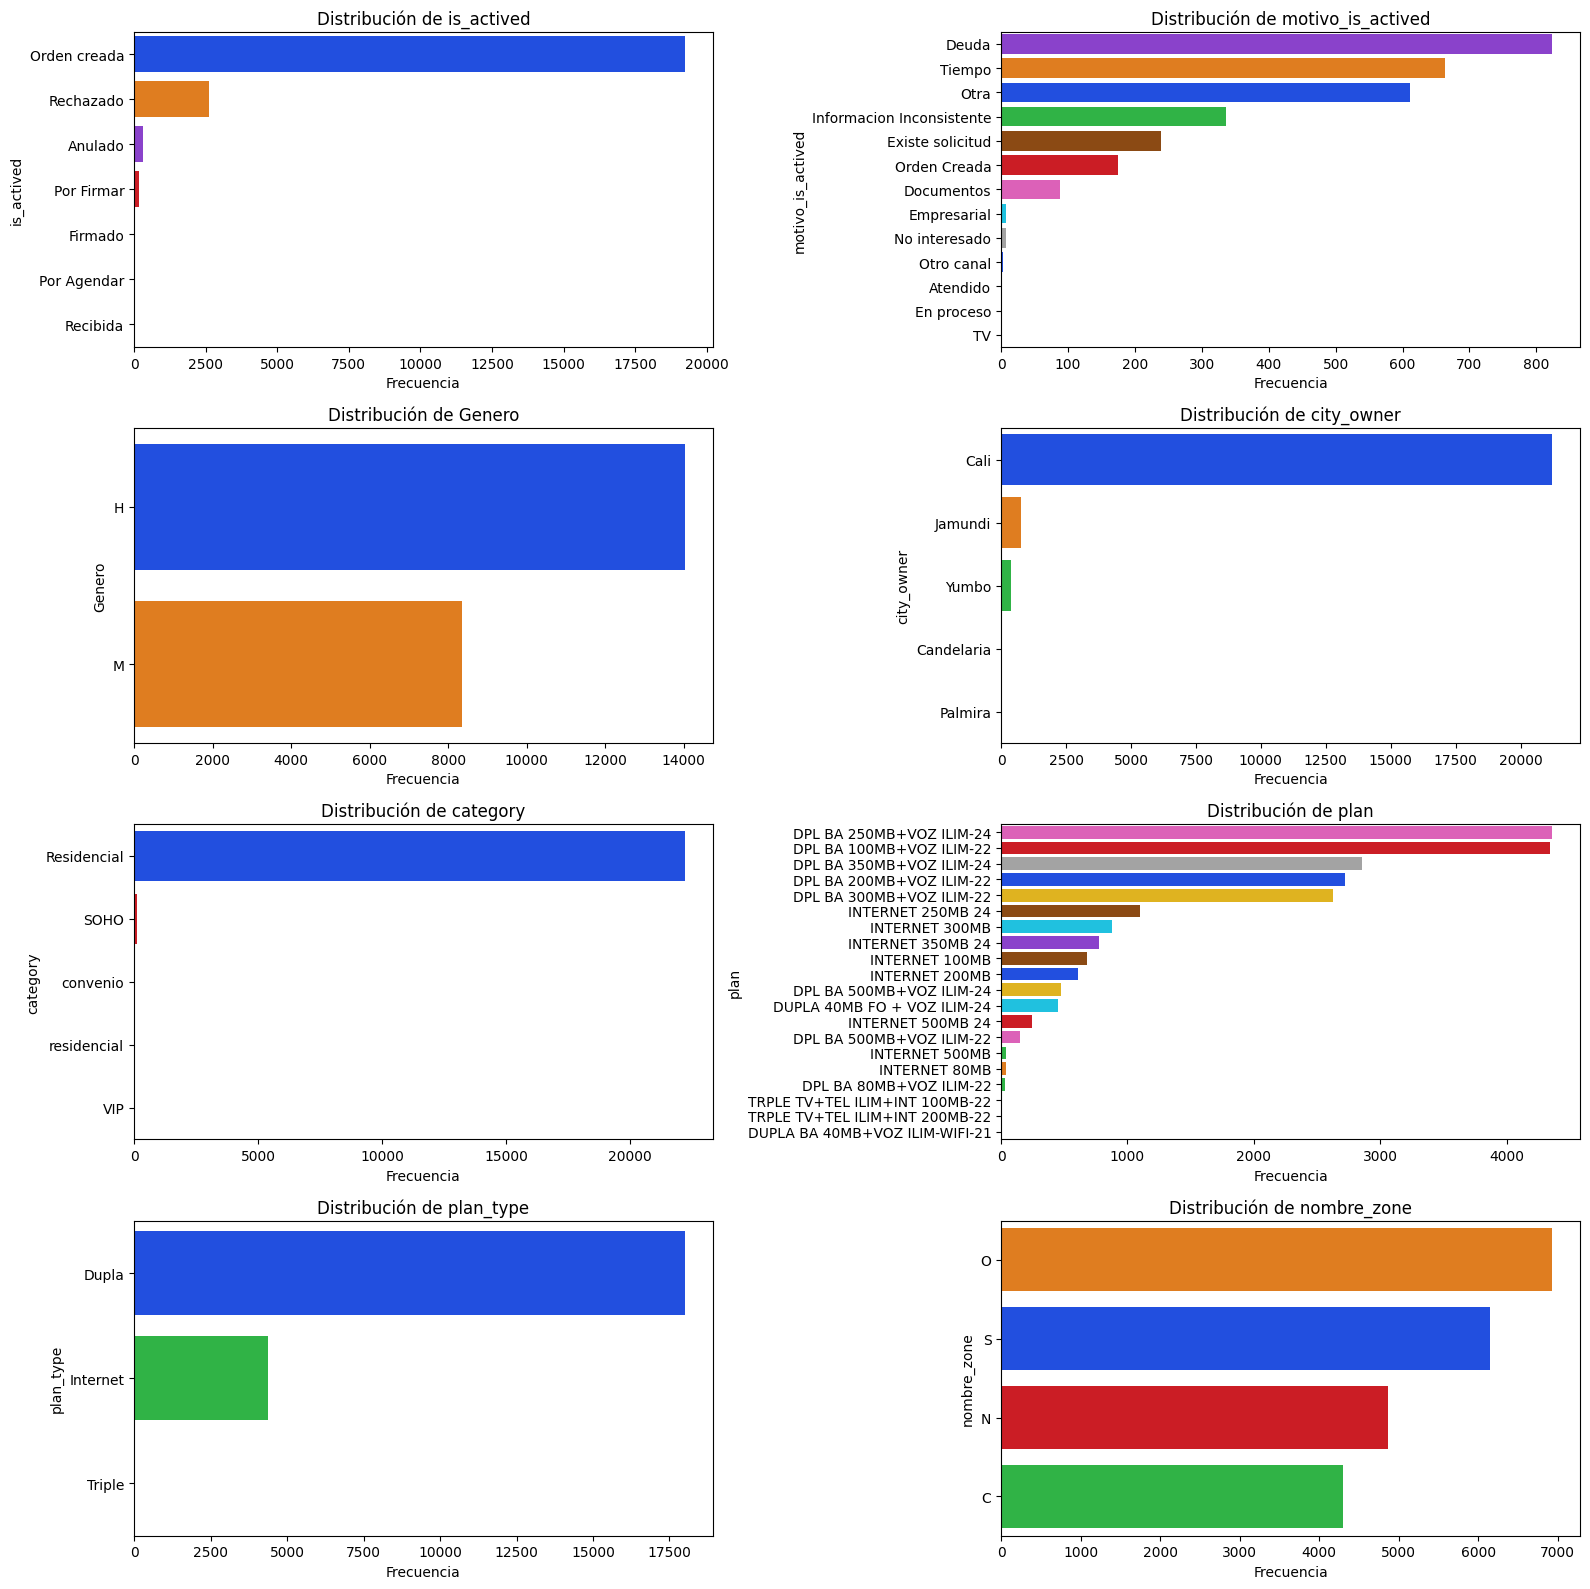

In [12]:
# Lista de variables categóricas más representativas para el análisis
selected_categorical = ["is_actived", "motivo_is_actived", "Genero", "city_owner", 
                        "category", "plan", "plan_type", "nombre_zone"]

# Configurar el tamaño del gráfico en un grid de 4x2
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Generar gráficos de barras para cada variable seleccionada
for ax, col in zip(axes.flatten(), selected_categorical):
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="bright", hue=df[col], legend=False, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

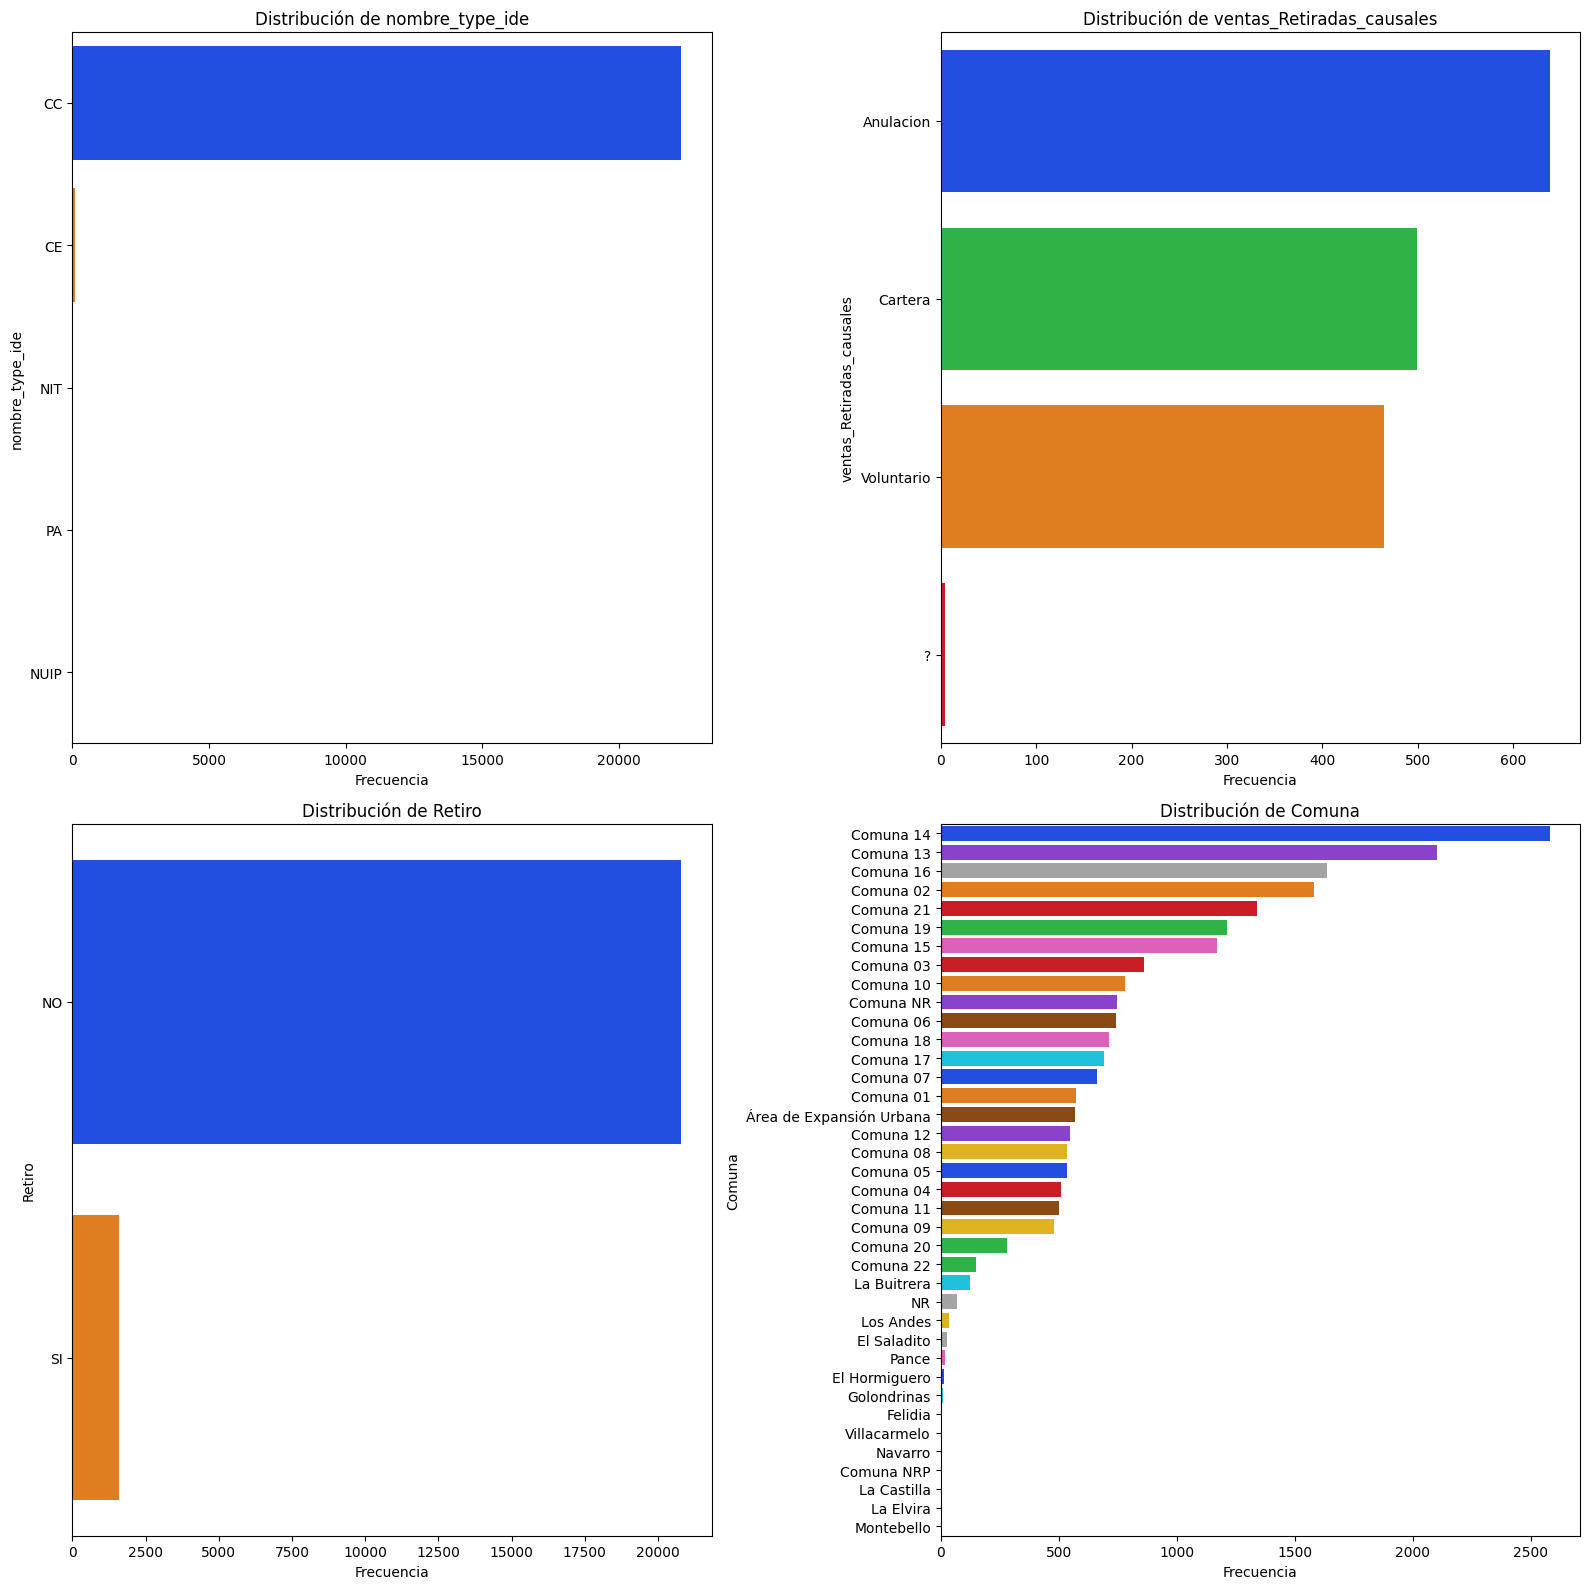

In [13]:
# Lista de variables categóricas más representativas para el análisis
selected_categorical = ["nombre_type_ide", "ventas_Retiradas_causales", "Retiro", "Comuna"]

# Configurar el tamaño del gráfico en un grid de 4x2
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Generar gráficos de barras para cada variable seleccionada
for ax, col in zip(axes.flatten(), selected_categorical):
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="bright", hue=df[col], legend=False, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### Análisis de Variables Categóricas
Las variables categóricas analizadas reflejan información clave sobre la contratación y cancelación de planes de internet. A continuación, se detallan los principales hallazgos:

### Estado de la Orden (is_actived)
La mayoría de las órdenes están en el estado "Orden creada", lo que indica que una gran parte de las solicitudes están en proceso o pendientes.
- El estado "Rechazado" es el segundo más frecuente, lo que sugiere que existe una tasa significativa de no aprobación de solicitudes.
- Los estados "Anulado", "Por Firmar" y "Por Agendar" tienen una baja representación, indicando que estos casos son menos comunes.

### Motivo de Rechazo (motivo_is_actived)
Los principales motivos de rechazo están relacionados con "Deuda", "Tiempo" e "Información inconsistente".
La categoría "Otra" también tiene una alta frecuencia, lo que indica que hay múltiples causas no especificadas en los datos.

### Género (Genero)
Hay una ligera predominancia de clientes de género masculino ("H") sobre femenino ("M") en la base de datos.
Esto podría estar relacionado con el perfil del tomador de decisiones en la contratación del servicio.

### Ciudad del Cliente (city_owner)
La mayoría de los clientes se encuentran en Cali, con un número reducido de registros en municipios cercanos como Jamundí, Yumbo, Candelaria y Palmira.
Esto indica que el mercado principal está concentrado en la ciudad de Cali.

### Categoría del Servicio (category)
El servicio residencial es el dominante, mientras que las categorías "SOHO", "Convenio" y "VIP" tienen una representación mínima.
Esto sugiere que la oferta está mayormente dirigida a hogares y no a empresas o clientes de alto valor.

### Tipo de Plan (plan_type)
Los planes de tipo "Duple" (internet + otro servicio) son los más contratados, seguidos por planes de solo internet.
Los planes "Triple" (TV + Internet + Telefonía) tienen menor participación, lo que puede reflejar una menor demanda en este segmento.

### Zona de Contratación (nombre_zone)
La mayoría de los contratos se encuentran en las zonas "O", "S" y "N", mientras que las zonas "C" y otras tienen menos demanda.
Esto podría estar relacionado con la cobertura del servicio en la ciudad.

### Comuna (Comuna)
- Las comunas con más contrataciones son la 14, 13, 16, 07 y 21, que suelen ser zonas de estratos bajos y medios.
Otras comunas con alta demanda incluyen la 15, 08 y 11.
- Comunas con menor cantidad de registros como Montebello, La Estrella y Navarro podrían representar zonas con menor cobertura o menor interés en los planes ofrecidos.

### Conclusiones
- Alto volumen de rechazos: Se deben revisar las principales causas (Deuda, Tiempo e Información inconsistente) para mejorar la conversión de solicitudes en contrataciones efectivas.
- Enfoque residencial: La mayoría de los planes son contratados por clientes residenciales. Es importante evaluar si existe una oportunidad de crecimiento en el segmento SOHO o empresarial.
- Segmentación por comuna y ciudad: La mayor parte de las contrataciones provienen de Cali, especialmente de comunas de estratos bajos y medios. Se puede reforzar la oferta en estas zonas y explorar estrategias para incrementar la presencia en otras.
- Planes más populares: Los planes tipo Duple (internet + voz) son los más atractivos, lo que indica que la combinación de servicios es un factor clave en la decisión de compra.

## Analisis de Varaibles Numericas

In [14]:
# Seleccionar las columnas numericas
numerical_columns = df.select_dtypes(include=['number']).columns

# Mostrar el número de columnas numericas
print(f"Número de variables numericas: {len(numerical_columns)}")

# Mostrar los nombres de las columnas numericas
print("Variables numericas:")
print(numerical_columns.to_list())

Número de variables numericas: 17
Variables numericas:
['id', 'causal_anulacion_id', 'id_genero', 'Edad', 'type_service', 'estrato', 'id_plan', 'id_plan_open', 'price_plan', 'user_creation_id', 'contract', 'package', 'zone', 'type_ide', 'id_barrios', 'id_comuna', 'barrios_id_ciudades']


In [15]:
# Lista de variables numéricas
numerical_columns = df.select_dtypes(include=['number']).columns

# Mostrar el resumen estadístico de cada variable numérica
for col in numerical_columns:
    print(f"\nResumen estadístico de {col}:\n", df[col].describe())


Resumen estadístico de id:
 count    22393.000000
mean     11375.507659
std       6493.610194
min         33.000000
25%       5757.000000
50%      11377.000000
75%      16993.000000
max      22627.000000
Name: id, dtype: float64

Resumen estadístico de causal_anulacion_id:
 count    329.000000
mean      25.328267
std        1.714845
min       17.000000
25%       25.000000
50%       25.000000
75%       26.000000
max       27.000000
Name: causal_anulacion_id, dtype: float64

Resumen estadístico de id_genero:
 count    22393.000000
mean         1.372795
std          0.483559
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: id_genero, dtype: float64

Resumen estadístico de Edad:
 count    22393.000000
mean        41.863618
std         13.626915
min         18.000000
25%         30.000000
50%         42.000000
75%         53.000000
max         66.000000
Name: Edad, dtype: float64

Resumen estadístico de type_service:
 count

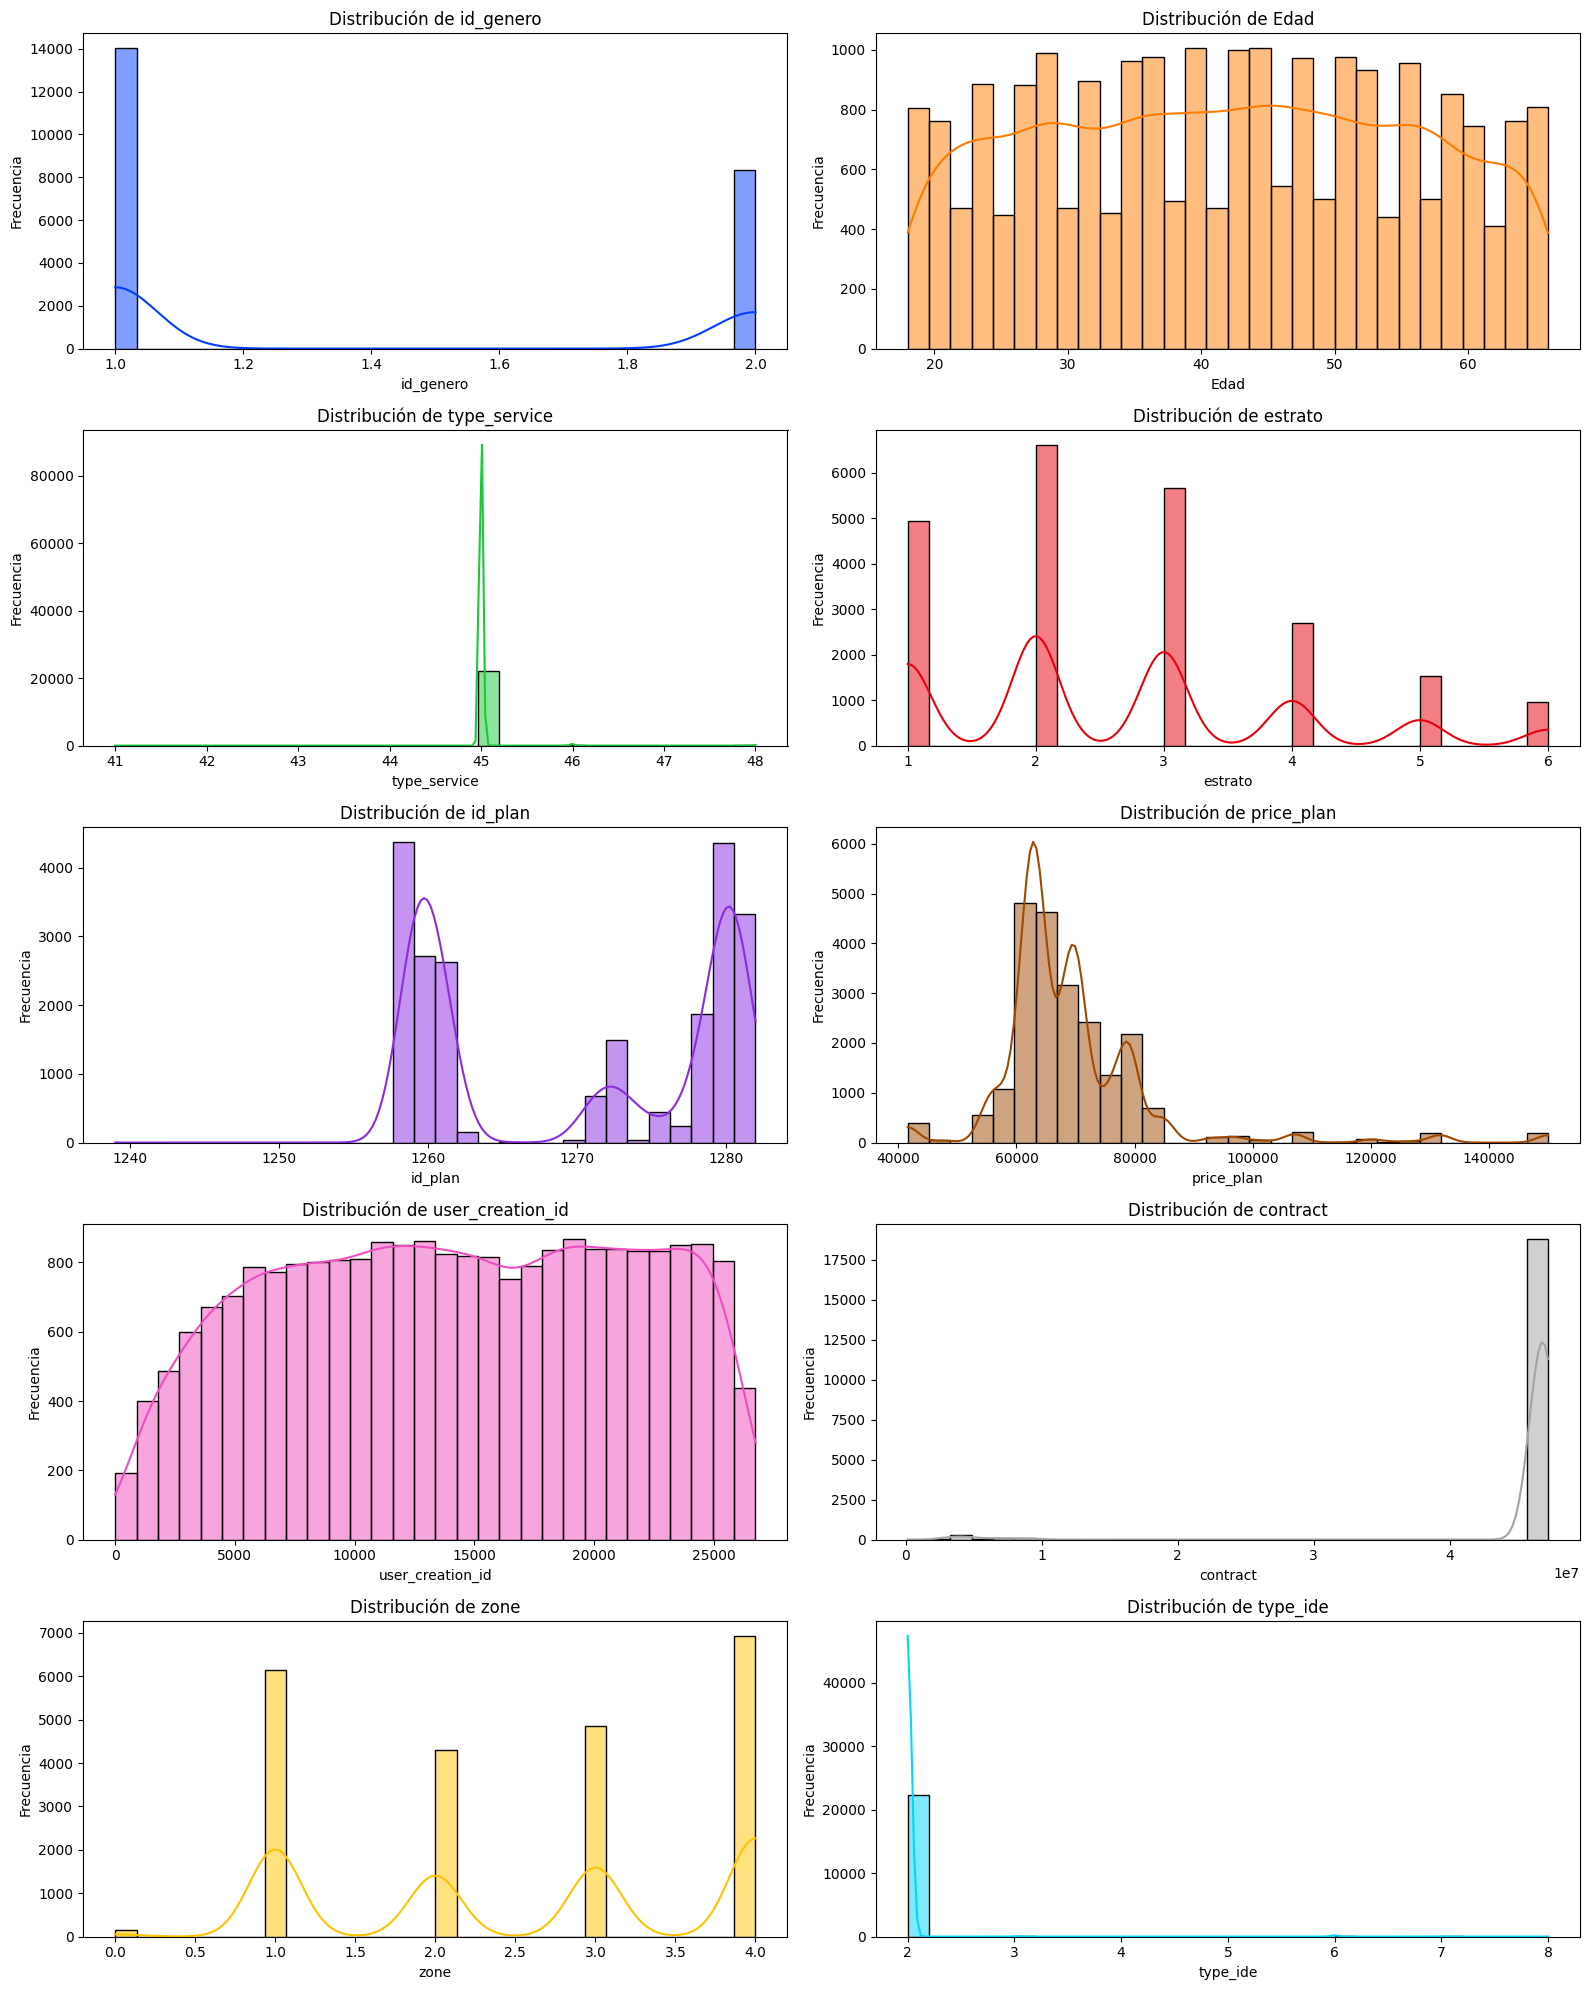

In [16]:
# Selección de variables numéricas relevantes para el análisis
numerical_columns = ["id_genero", "Edad", "type_service", "estrato", "id_plan", "price_plan", "user_creation_id", "contract", "zone", "type_ide"]

# Lista de colores personalizados
colors = sns.color_palette("bright", len(numerical_columns))

# Configurar el tamaño del gráfico en un grid de 5x2
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

# Generar histogramas para cada variable numérica
for ax, col, color in zip(axes.flatten(), numerical_columns, colors):
    sns.histplot(df[col], bins=30, kde=True, color=color, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Análisis de Variables Numéricas
El análisis de las variables numéricas en el dataset nos permite entender la distribución de los datos, identificar posibles valores atípicos y analizar su impacto en la contratación de planes de internet.

### Análisis de la Variable Edad
Rango: 18 a 66 años.
Media: 41.86 años.
Distribución: Relativamente uniforme entre los 20 y 60 años.
Interpretación: Los clientes se encuentran en un amplio rango de edades, con una ligera concentración en la mediana edad. No hay valores extremos evidentes.

### Análisis de la Variable Estrato
Rango: 1 a 6.
Media: 2.65.
Distribución: Predominio en estratos 2 y 3, con menor representación en los estratos altos.
Interpretación: Esto sugiere que la mayoría de las contrataciones provienen de clientes de ingresos medios-bajos, lo que es clave para la oferta de planes de internet accesibles.

### Análisis de la Variable price_plan (Precio del Plan)
Rango: 41,576 a 149,999.
Media: 69,335.
Distribución: Se observa una mayor concentración de planes en rangos de 60,000 a 80,000.
Interpretación: La mayoría de los planes contratados están en un rango medio de precios, lo que indica que los usuarios buscan equilibrio entre costo y beneficios.

### Análisis de la Variable zone
Rango: 0 a 4.
Media: 2.54.
Distribución: Se observa una distribución casi equitativa entre las zonas.
Interpretación: No hay una zona con predominancia absoluta, lo que sugiere que las contrataciones están dispersas en varias ubicaciones de Cali.

### Análisis de la Variable contract
Media: 45,660,180.
Mínimo: 149,171.
Máximo: 47,222,590.
Interpretación: Se debe revisar si esta variable representa un identificador o si tiene relación con la contratación, ya que los valores parecen ser secuenciales.

### Análisis de id_plan y id_plan_open
Los valores están concentrados en ciertos rangos, lo que indica que hay planes específicos con mayor demanda.
Interpretación: Puede ser útil analizar qué planes específicos tienen mayor tasa de contratación y cuáles tienen mayor rechazo.

### Conclusiones
- Segmentación de clientes por estrato y edad → La mayoría de los clientes provienen de estratos 2 y 3, por lo que las estrategias comerciales deben enfocarse en estos segmentos.
- Precios más atractivos → La mayoría de los planes se contratan en el rango de 60,000 a 80,000, lo que indica una oportunidad para optimizar la oferta en este rango.
- Análisis por zonas → No hay una zona dominante, lo que sugiere que la demanda está distribuida y que se deben evaluar estrategias de cobertura y oferta en distintas localidades.

## Analisis de Varaibles Continuas

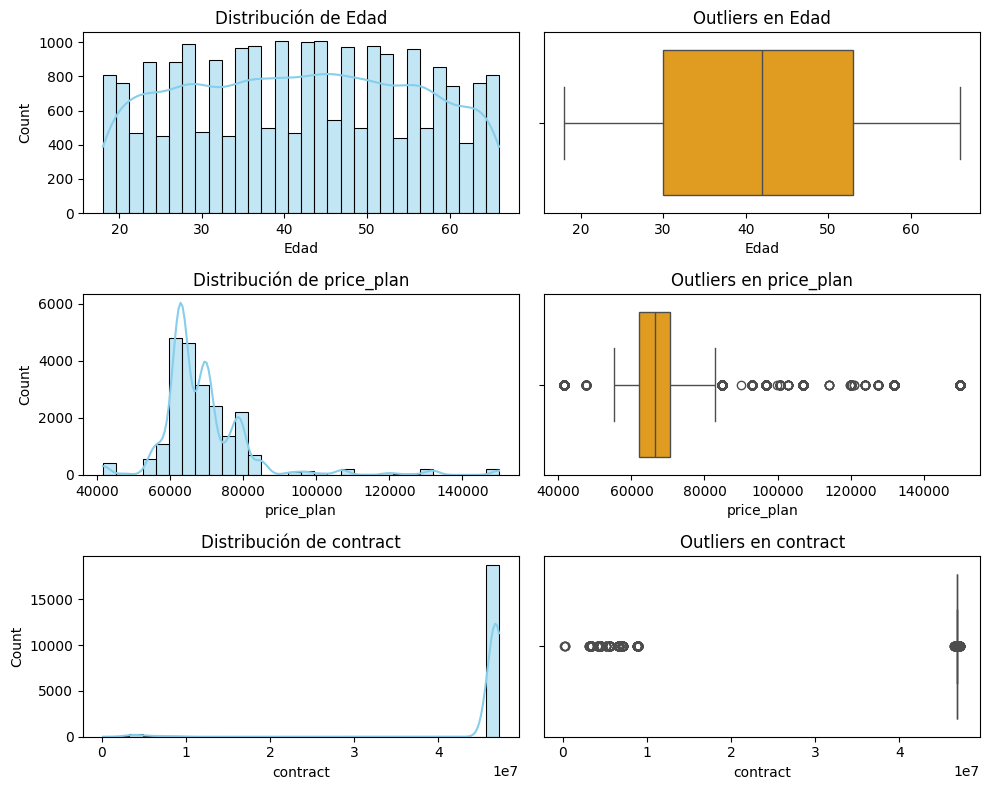

In [10]:
# Selección de variables continuas
continuous_vars = ["Edad", "price_plan", "contract"]

# Configurar tamaño del gráfico
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Análisis de distribución e identificación de outliers con boxplots
for i, col in enumerate(continuous_vars):
    # Histograma
    sns.histplot(df[col], bins=30, kde=True, color="skyblue", ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribución de {col}")

    # Boxplot para detectar outliers
    sns.boxplot(x=df[col], color="orange", ax=axes[i, 1])
    axes[i, 1].set_title(f"Outliers en {col}")

plt.tight_layout()
plt.show()

### Variables Continuas en el Dataset
- Edad → Varía de 18 a 66 años.
- price_plan → Precio del plan (41,576 a 149,999).
- contract → Aunque parece un identificador, sus valores son continuos.
- user_creation_id → Identificador de usuario, aunque numérico, probablemente no sea útil como variable continua.
- id_barrios, id_comuna, barrios_id_ciudades → Representan identificadores de ubicación.

### Variables Discretas (no continuas)
Las siguientes variables son numéricas, pero no continuas, ya que solo toman ciertos valores específicos:

- estrato (1 a 6) → Es una variable categórica ordinal.
- zone (0 a 4) → Representa zonas geográficas discretas.
- type_service (41 a 48) → Solo toma valores específicos.
- id_plan y id_plan_open → Son identificadores, no valores continuos.

***
***
***
# Limpieza de los datos

In [ ]:
# volvemos a cargar el dataset con los datos originales

df = pd.read_excel("./Data/Ventas_portal_data_bruta.xlsx")
#df = pd.read_excel('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/Ventas_portal_data_bruta.xlsx')

***
## Valores Nulos

In [18]:
# tamaño actual del dataset
df.shape

(22393, 34)

In [20]:
# Filtrar columnas con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()]

# Filtrar columnas con valores nulos y contar la cantidad de valores nulos en cada una
valores_nulos = df[columnas_con_nulos].isnull().sum()

# Mostrar las columnas con valores nulos y la cantidad de valores nulos en cada una
print("Cantidad de valores nulos por columna:\n", valores_nulos)

Cantidad de valores nulos por columna:
 motivo_is_actived                 19434
causal_anulacion_id               22064
price_plan                            8
contract                           3041
nombre_zone                         157
ventas_Retiradas_causales         20787
ventas_Retiradas_nombre_causal    20787
fecha_retiro                      20787
id_barrios                          577
Barrios                             577
id_comuna                           577
Comuna                              577
barrios_id_ciudades                 577
dtype: int64


In [21]:
# Calcular el porcentaje de valores nulos por columna
missing_percentage = df.isnull().sum() / len(df) * 100

# Filtrar columnas con valores nulos
columns_with_missing = missing_percentage[missing_percentage > 0]

# Mostrar las columnas con valores nulos y su porcentaje
missing_list = columns_with_missing.reset_index().values.tolist()
missing_list = [(col, f"{perc:.2f}%") for col, perc in missing_list]

# Imprimir la lista de columnas con valores nulos y su porcentaje
for col, perc in missing_list:
    print(f"Variable: {col}: {perc}")

Variable: motivo_is_actived: 86.79%
Variable: causal_anulacion_id: 98.53%
Variable: price_plan: 0.04%
Variable: contract: 13.58%
Variable: nombre_zone: 0.70%
Variable: ventas_Retiradas_causales: 92.83%
Variable: ventas_Retiradas_nombre_causal: 92.83%
Variable: fecha_retiro: 92.83%
Variable: id_barrios: 2.58%
Variable: Barrios: 2.58%
Variable: id_comuna: 2.58%
Variable: Comuna: 2.58%
Variable: barrios_id_ciudades: 2.58%


***
### Eliminar columnas con más del 90% de valores nulos, ya que aportan poca información:
### causal_anulacion_id, ventas_Retiradas_nombre_causal

- Variable: causal_anulacion_id: 98.53%, es una variable identificadora no expresa valores continuos
- Variable: ventas_Retiradas_nombre_causal: 92.83%, muy pocos datos.

In [157]:
# Lista de columnas a eliminar
columns_to_drop = ["causal_anulacion_id", "ventas_Retiradas_nombre_causal"]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columns_to_drop)

# Mostrar el DataFrame después de eliminar las columnas
df.shape

(22393, 32)

***
### motivo_is_actived: reclasificacion de valores, nueva variable motivo_rechazo_solicitud

In [158]:
#Valores de motivo_is_actived
print(df["motivo_is_actived"].value_counts())

motivo_is_actived
Deuda                        824
Tiempo                       664
Otra                         611
Informacion Inconsistente    336
Existe solicitud             239
Orden Creada                 175
Documentos                    88
Empresarial                    8
No interesado                  7
Otro canal                     3
Atendido                       2
En proceso                     1
TV                             1
Name: count, dtype: int64


In [160]:
# Reclasificar los valores de la columna motivo_is_actived y crear una nueva columna

def categorizar_motivo(motivo):
    if motivo in ["Deuda"]:
        return "Financiero"
    elif motivo in ["Informacion Inconsistente", "Documentos"]:
        return "Errores en la Solicitud"
    elif motivo in ["No interesado", "Otro canal"]:
        return "Falta de Interés"
    elif motivo in ["Tiempo", "En proceso", "Atendido"]:
        return "Tiempos y Procesos"
    elif motivo in ["Existe solicitud", "Orden Creada"]:
        return "Doble Solicitud"
    else:
        return "Otro"

df["motivo_rechazo_solicitud"] = df["motivo_is_actived"].apply(lambda x: categorizar_motivo(x) if pd.notnull(x) else "No Aplica")
print(df["motivo_rechazo_solicitud"].value_counts())

motivo_rechazo_solicitud
No Aplica                  19434
Financiero                   824
Tiempos y Procesos           667
Otro                         620
Errores en la Solicitud      424
Doble Solicitud              414
Falta de Interés              10
Name: count, dtype: int64


In [161]:
#eliminacion de la columna motivo_is_actived
df = df.drop(columns=["motivo_is_actived"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(22393, 32)

***
### Eliminacion de variables identificadoras:
### "id_barrios", "id_comuna", "barrios_id_ciudades"

In [162]:
# eliminacion de la columnas: id_barrios, id_comuna, barrios_id_ciudades
df = df.drop(columns=["id_barrios", "id_comuna", "barrios_id_ciudades"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(22393, 29)

***
###  price_plan: se completan valores nulos con el promedio

In [163]:
# Calcular el promedio de los valores no nulos en la columna 'price_plan'
mean_price_plan = df['price_plan'].mean()

# Reemplazar los valores nulos en 'price_plan' con el promedio
df['price_plan'] = df['price_plan'].fillna(mean_price_plan)

# Verificar que los valores nulos han sido reemplazados
print("Valores nulos en 'price_plan' después del reemplazo:")
print(df['price_plan'].isnull().sum())

Valores nulos en 'price_plan' después del reemplazo:
0


***
### contract: Se elimina variable, representa numero identificador unico en todo el df

In [164]:
# eliminacion de la columnas: contract
df = df.drop(columns=["contract"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(22393, 28)

***
### nombre_zone: Eliminacion de los registros nulos

In [165]:
# Contar los registros nulos en la columna "nombre_zone"
nulos_nombre_zone = df["nombre_zone"].isnull().sum()

# Mostrar la cantidad de registros nulos que se van a eliminar
print(f"Registros nulos en 'nombre_zone' que se van a eliminar: {nulos_nombre_zone}")

# Mostrar el conteo de valores en la columna "nombre_zone"
print(df["nombre_zone"].value_counts())

Registros nulos en 'nombre_zone' que se van a eliminar: 157
nombre_zone
O    6933
S    6143
N    4863
C    4297
Name: count, dtype: int64


In [166]:
#Eliminar los registros con valores nulos en la columna 'nombre_zone'
df = df.dropna(subset=["nombre_zone"])
df.shape

(22236, 28)

***
### ventas_Retiradas_causales: eliminacion de la categoria "?" y valores nulos con "No Aplica"

In [167]:
# Mostrar la cantidad de categorias es 'ventas_Retiradas_causales'
print(df["ventas_Retiradas_causales"].value_counts())

ventas_Retiradas_causales
Anulacion     634
Cartera       493
Voluntario    437
?               4
Name: count, dtype: int64


In [168]:
#eliminacion de registros con valores ? en la columna ventas_Retiradas_causales
df = df[df["ventas_Retiradas_causales"] != "?"]
df.shape

(22232, 28)

In [169]:
# Mostrar la cantidad de categorias es 'ventas_Retiradas_causales'
print(df["ventas_Retiradas_causales"].value_counts())

ventas_Retiradas_causales
Anulacion     634
Cartera       493
Voluntario    437
Name: count, dtype: int64


In [170]:
# Reemplazar los valores nulos en 'ventas_Retiradas_causales' con "No Aplica"
df['ventas_Retiradas_causales'] = df['ventas_Retiradas_causales'].fillna("No Aplica")
df.shape

(22232, 28)

In [171]:
# Mostrar la cantidad de categorias es 'ventas_Retiradas_causales'
print(df["ventas_Retiradas_causales"].value_counts())

ventas_Retiradas_causales
No Aplica     20668
Anulacion       634
Cartera         493
Voluntario      437
Name: count, dtype: int64


***
### Barrios: Eliminacion de la categoria: muchas categorias que pueden afectar la precision del modelo.

In [172]:
# Contar el número de categorías únicas en la columna "Barrios"
num_categorias = df["Barrios"].nunique()

# Contar el número de valores nulos en la columna "Barrios"
num_nulos = df["Barrios"].isnull().sum()

# Mostrar la cantidad de categorías y valores nulos
print(f"La columna 'Barrios' tiene {num_categorias} categorías únicas.")
print(f"La columna 'Barrios' tiene {num_nulos} valores nulos.")

La columna 'Barrios' tiene 386 categorías únicas.
La columna 'Barrios' tiene 558 valores nulos.


In [174]:
# Se elimina la variable Barrios
df = df.drop(columns=["Barrios"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(22232, 27)

***
### Comuna: se eliminan los valores nulos

In [175]:
# Se elimina los valores nulos de la columna Comuna
df = df.dropna(subset=["Comuna"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21674, 27)

***
### fecha_retiro: Mas del 90% son datos nulos

In [176]:
# Eliminacion de fecha_retiro
df = df.drop(columns=["fecha_retiro"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21674, 26)

## Resultado de la limpieza de datos nulos.

In [177]:
df.isna().sum()   

id                           0
date_creation                0
is_actived                   0
Genero                       0
id_genero                    0
Edad                         0
city_owner                   0
category                     0
type_service                 0
estrato                      0
plan                         0
id_plan                      0
id_plan_open                 0
price_plan                   0
user_creation_id             0
cdo                          0
package                      0
plan_type                    0
zone                         0
nombre_zone                  0
type_ide                     0
nombre_type_ide              0
ventas_Retiradas_causales    0
Retiro                       0
Comuna                       0
motivo_rechazo_solicitud     0
dtype: int64

***
## Selección y Transformación de Variables

***
### id: Eliminacion de variable

In [178]:
#eliminacion de variable id
df = df.drop(columns=["id"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21674, 25)

***
### date_creation: se crea las variables mes y dia. Se elimina la variable date_creation

In [179]:
#creacion de variables mes y dia
df["date_creation"] = pd.to_datetime(df["date_creation"])
df["mes"] = df["date_creation"].dt.month
df["dia"] = df["date_creation"].dt.day

In [180]:
#Se elimina la variable date_creation
df = df.drop(columns=["date_creation"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21674, 26)

***
### Eliminacion de variables de tipo numero identificador unico : id_genero, id_plan_open, user_creation_id

In [181]:
#Eliminacion de la variables id_genero, id_plan_open, user_creation_id
df = df.drop(columns=["id_genero", "id_plan_open", "user_creation_id"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21674, 23)

***
### is_actived: Se reajustan las categorias. se Crea la varaiable venta.

In [183]:
# Mostrar la cantidad de categorias de 'is_actived'
print(df["is_actived"].value_counts())

is_actived
Orden creada    18658
Rechazado        2523
Anulado           318
Por Firmar        163
Firmado            10
Recibida            2
Name: count, dtype: int64


In [184]:
# Definir las categorías que se mantendrán
categorias_principales = ["Orden creada", "Rechazado", "Anulado"]

# Reemplazar las categorías menos frecuentes por "Anulado"
df["is_actived"] = df["is_actived"].replace(
    {cat: "Anulado" for cat in df["is_actived"].unique() if cat not in categorias_principales}
)

# Verificar los cambios
print(df["is_actived"].value_counts())

is_actived
Orden creada    18658
Rechazado        2523
Anulado           493
Name: count, dtype: int64


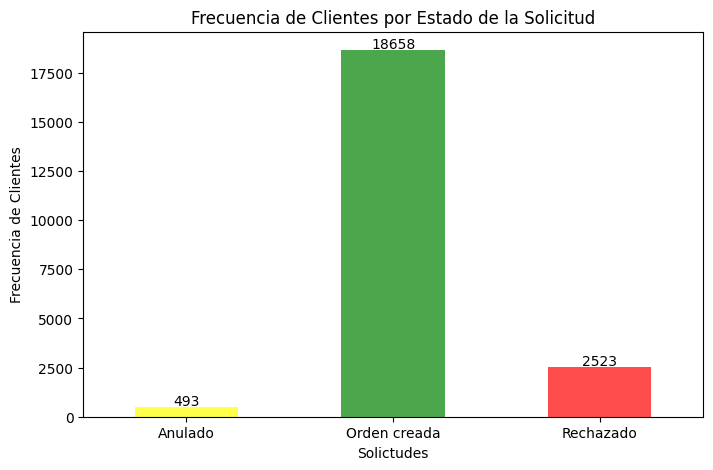

In [185]:
# Cantidad de registros por estrato

frecuencia_estrato = df['is_actived'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
frecuencia_estrato.plot(kind='bar', color=['yellow', 'green', 'red'], alpha=0.7)
plt.xlabel('Solictudes')
plt.ylabel('Frecuencia de Clientes')
plt.title('Frecuencia de Clientes por Estado de la Solicitud')
plt.xticks(rotation=0)

# Mostrar valores en las barras
for i, v in enumerate(frecuencia_estrato.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()

In [186]:
#Se crea la variable venta
df['venta'] = df['is_actived'].apply(lambda x: 1 if x == "Orden creada" else 0)
df.shape

(21674, 24)

***
### city_owner: Se eliminan las categorias Candelaria y Palmira

In [187]:
# Mostrar la cantidad de categorias de 'is_actived'
print(df["city_owner"].value_counts())

city_owner
Cali          20625
Jamundi         750
Yumbo           284
Candelaria       12
Palmira           3
Name: count, dtype: int64


In [188]:
# Filtrar el DataFrame para excluir las categorías "Candelaria" y "Palmira"
df = df[~df["city_owner"].isin(["Candelaria", "Palmira"])]

# Verificar los cambios
print(df["city_owner"].value_counts())

city_owner
Cali       20625
Jamundi      750
Yumbo        284
Name: count, dtype: int64


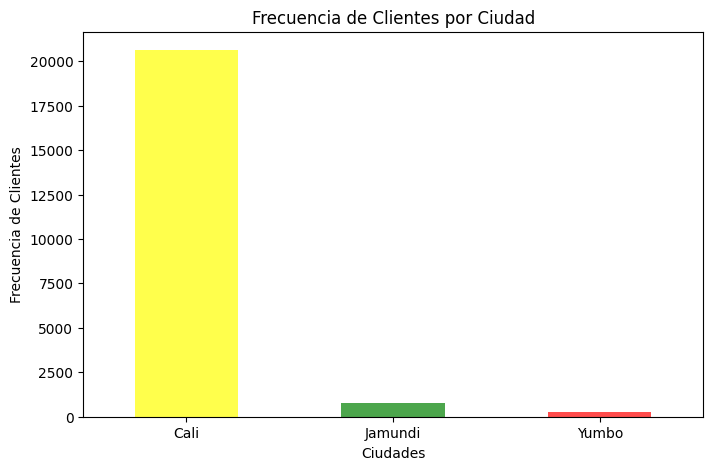

In [189]:
#hacer grafica de la cantidad de de valores en la categoria city_owner
frecuencia_city_owner = df['city_owner'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
frecuencia_city_owner.plot(kind='bar', color=['yellow', 'green', 'red'], alpha=0.7)
plt.xlabel('Ciudades')
plt.ylabel('Frecuencia de Clientes')
plt.title('Frecuencia de Clientes por Ciudad')
plt.xticks(rotation=0)

plt.show()


In [190]:
df.shape

(21659, 24)

***
### category: se elimina variable, las otras categorias no son representativas, se toman todos los regintros unicamente en la categoria Residencial

In [191]:
print(df["category"].value_counts())

category
Residencial    21493
SOHO             109
convenio          43
residencial       13
VIP                1
Name: count, dtype: int64


In [192]:
# Eliminar la variable category
df = df.drop(columns=["category"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 23)

***
### type_service: se elimina variable

In [194]:
print(df["type_service"].value_counts())

type_service
45    21506
46      109
48       43
41        1
Name: count, dtype: int64


In [195]:
#Eliminacion de type_service
df = df.drop(columns=["type_service"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 22)

***
### Genero: se mantiene original

In [196]:
#Valores de Genero
print(df["Genero"].value_counts())

Genero
H    13583
M     8076
Name: count, dtype: int64


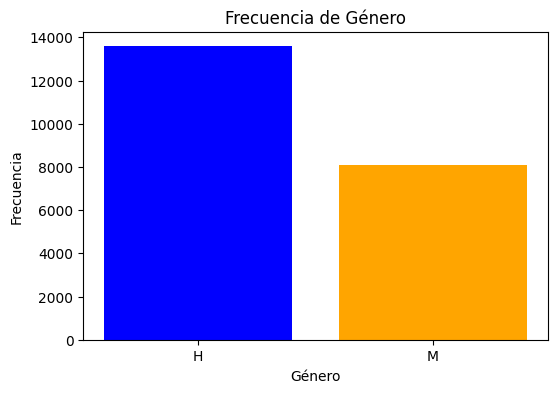

In [199]:
# Contar la frecuencia de cada categoría en la columna "Genero"
frecuencia_genero = df["Genero"].value_counts()

# Crear un gráfico de barras para la frecuencia de "Genero"
plt.figure(figsize=(6, 4))
plt.bar(frecuencia_genero.index, frecuencia_genero.values, color=['blue', 'orange'])
plt.title("Frecuencia de Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

***
### Edad: se mantiene original, se crea la nueva categoria grupo_edad

In [200]:
# Mostrar la cantidad de categorias de 'Edad'
print(df["Edad"].value_counts())

Edad
46    524
40    521
35    510
50    502
43    501
44    491
47    489
29    487
49    485
57    479
36    477
45    476
38    475
42    469
28    468
37    466
56    465
55    462
39    459
27    458
23    457
48    455
53    454
41    453
52    453
22    450
30    449
32    440
51    438
25    437
33    434
58    434
54    429
31    427
34    423
65    414
26    407
62    401
24    398
59    396
19    395
18    388
64    381
66    373
20    372
21    365
63    362
61    356
60    354
Name: count, dtype: int64


In [201]:
df.shape

(21659, 22)

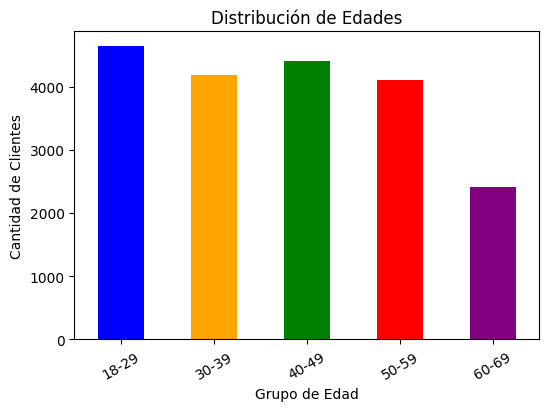

(19749, 16)

In [267]:
# Definir rangos de edad
bins_edad = [18, 30, 40, 50, 60, 70]
labels_edad = ['18-29', '30-39', '40-49', '50-59', '60-69']

# Crear una nueva columna con los grupos de edad
df['grupo_edad'] = pd.cut(df['Edad'], bins=bins_edad, labels=labels_edad, right=False)


# Crear gráfico de barras agrupado por rangos de edad
plt.figure(figsize=(6, 4))
df['grupo_edad'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title(f'Distribución de Edades')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=30)

# Mostrar el gráfico
plt.show()

df['grupo_edad'].value_counts().sort_index()
df.shape

In [203]:
df['grupo_edad'].value_counts().sort_index()

grupo_edad
18-24    2825
25-34    4430
35-44    4822
45-54    4705
55-64    4090
Name: count, dtype: int64

***
### estrato: se mantiene original

In [204]:
# categorias de la varaible estrato
print(df["estrato"].value_counts())

estrato
2    6484
3    5476
1    4890
4    2568
5    1425
6     816
Name: count, dtype: int64


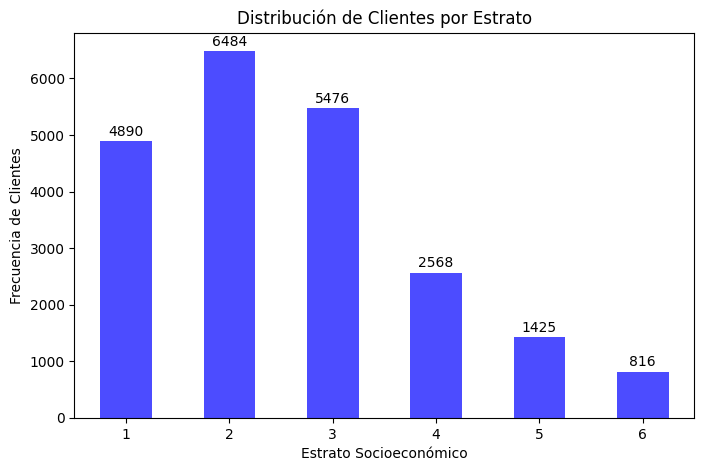

In [257]:
# Contar la frecuencia de cada categoría en la columna "estrato"
# Cantidad de registros por estrato

frecuencia_estrato = df['estrato'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
frecuencia_estrato.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Frecuencia de Clientes')
plt.title('Distribución de Clientes por Estrato')
plt.xticks(rotation=0)

# Mostrar valores en las barras
for i, v in enumerate(frecuencia_estrato.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()

- El segmento más grande de clientes proviene de los estratos 1, 2 y 3, lo que sugiere que la mayor cantidad de ventas en los próximos meses vendrá de estos grupos.
- No está balanceada, porque los estratos bajos (1, 2 y 3) tienen muchas más observaciones que los estratos altos (4, 5 y 6).
- tiene sesgo hacia los estratos bajos, porque la mayoría de los clientes pertenecen a los niveles 1, 2 y 3.

***
### plan: conversion de varible y nueva variable plan_MB

In [205]:
print(df["plan"].value_counts())

plan
DPL BA 250MB+VOZ ILIM-24          4300
DPL BA 100MB+VOZ ILIM-22          4256
DPL BA 350MB+VOZ ILIM-24          2794
DPL BA 200MB+VOZ ILIM-22          2644
DPL BA 300MB+VOZ ILIM-22          2487
INTERNET 250MB 24                 1063
INTERNET 300MB                     818
INTERNET 350MB 24                  751
INTERNET 100MB                     630
INTERNET 200MB                     569
DPL BA 500MB+VOZ ILIM-24           447
DUPLA 40MB FO + VOZ ILIM-24        437
INTERNET 500MB 24                  226
DPL BA 500MB+VOZ ILIM-22           140
INTERNET 500MB                      39
INTERNET 80MB                       31
DPL BA 80MB+VOZ ILIM-22             25
TRPLE TV+TEL ILIM+INT 100MB-22       2
Name: count, dtype: int64


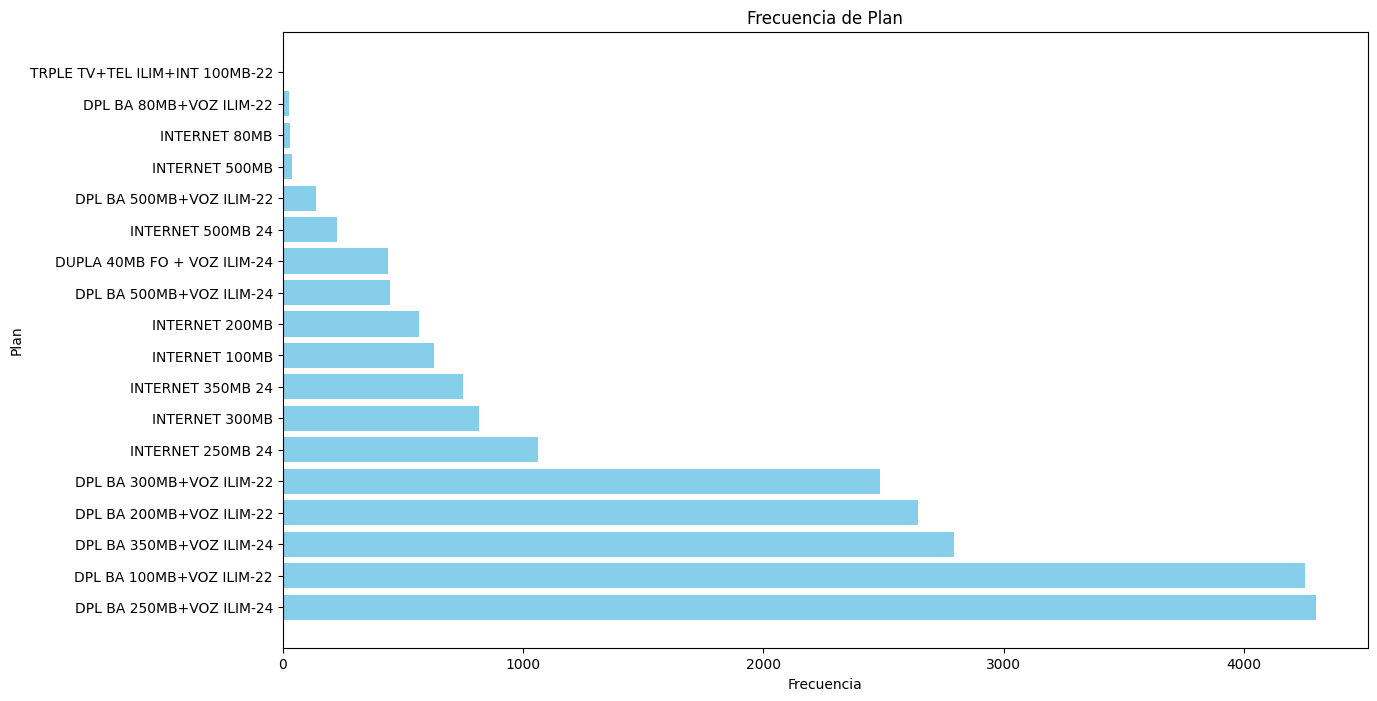

In [208]:
frecuencia_plan = df["plan"].value_counts()

# Crear un gráfico de barras para la frecuencia de "plan"
plt.figure(figsize=(14, 8))
plt.barh(frecuencia_plan.index, frecuencia_plan.values, color='skyblue')
plt.title("Frecuencia de Plan")
plt.xlabel("Frecuencia")
plt.ylabel("Plan")
plt.show()

In [211]:
# Función para agrupar los planes en dos categorías
def agrupar_plan(plan):
    if "DPL" in plan or "DUPLA" in plan or "TRPLE" in plan:
        return "Internet-voz"
    elif "INTERNET" in plan:
        return "Internet"
    else:
        return plan

# Aplicar la función a la columna "tipo_plan"
df["tipo_plan"] = df["plan"].apply(agrupar_plan)

# Verificar los cambios
print(df["tipo_plan"].value_counts())

tipo_plan
Internet-voz    17532
Internet         4127
Name: count, dtype: int64


In [214]:
df.shape

(21659, 24)

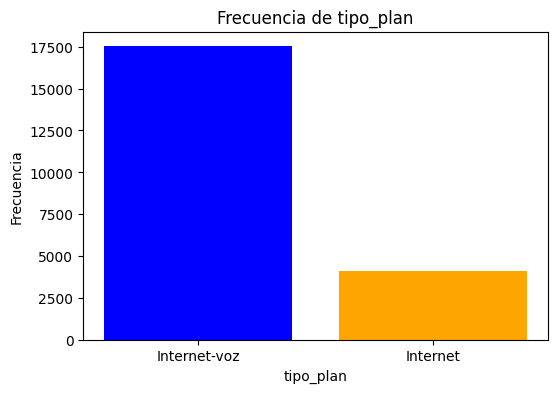

In [212]:
# Contar la frecuencia de cada categoría en la columna "tipo_plan"
frecuencia_genero = df["tipo_plan"].value_counts()

# Crear un gráfico de barras para la frecuencia de "tipo_plan"
plt.figure(figsize=(6, 4))
plt.bar(frecuencia_genero.index, frecuencia_genero.values, color=['blue', 'orange'])
plt.title("Frecuencia de tipo_plan")
plt.xlabel("tipo_plan")
plt.ylabel("Frecuencia")
plt.show()

In [215]:
import re

# Función para extraer los MB del plan
def extraer_mb(plan):
    match = re.search(r"(\d+)MB", plan)
    return int(match.group(1)) if match else None

# Crear una nueva columna con los MB del plan
df["plan_MB"] = df["plan"].apply(extraer_mb)

In [217]:
# valores de la varible plan_MB
print(df["plan_MB"].value_counts())

plan_MB
250    5363
100    4888
350    3545
300    3305
200    3213
500     852
40      437
80       56
Name: count, dtype: int64


In [219]:
# Eliminacion de la variable plan
df = df.drop(columns=["plan"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 24)

***
### id_plan: se elimina variable tipo numero identificador

In [220]:
#eliminar la variable id_plan
df = df.drop(columns=["id_plan"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 23)

***
### cdo: Eliminacion de la categoria: muchas categorias que pueden afectar la precision del modelo.

In [221]:
#eliminar la varible cdo
df = df.drop(columns=["cdo"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 22)

***
### package: La categoria no es representariva para el analisis

In [222]:
# categorias de la varaible package
print(df["package"].value_counts())

package
0    21104
1      555
Name: count, dtype: int64


In [223]:
#Eliminar la variable package
df = df.drop(columns=["package"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 21)

***
### plan_type: se elimina varaiable categorica, ya existe una variable que tiene la misma informacion: tipo_plan

In [224]:
#categorias de la variable plan_type
print(df["plan_type"].value_counts())

plan_type
Dupla       17532
Internet     4125
Triple          2
Name: count, dtype: int64


In [225]:
#eliminar la variable plan_type
df = df.drop(columns=["plan_type"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 20)

***
### zone: se elimina variable de tipo id.

In [226]:
#categorias de la variable zone
print(df["zone"].value_counts())

zone
4    6886
1    5896
3    4643
2    4234
Name: count, dtype: int64


In [228]:
#eliminar la variable zone
df = df.drop(columns=["zone"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 19)

***
### nombre_zone: se mantiene Normal

In [227]:
#categorias de la variable nombre_zone
print(df["nombre_zone"].value_counts())

nombre_zone
O    6886
S    5896
N    4643
C    4234
Name: count, dtype: int64


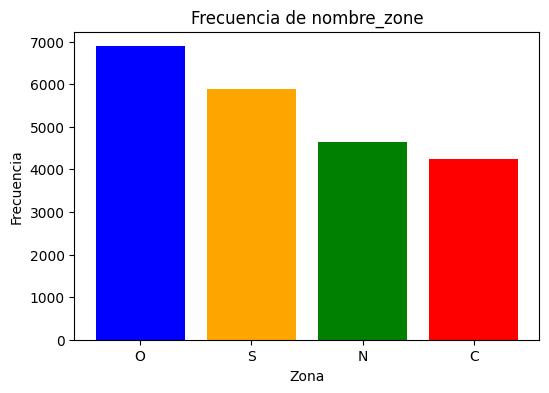

In [230]:
# Contar la frecuencia de cada categoría en la columna "nombre_zone"
frecuencia_nombre_zone = df["nombre_zone"].value_counts()

# Crear un gráfico de barras para la frecuencia de "nombre_zone"
plt.figure(figsize=(6, 4))
plt.bar(frecuencia_nombre_zone.index, frecuencia_nombre_zone.values, color=['blue', 'orange', 'green', 'red'])
plt.title("Frecuencia de nombre_zone")
plt.xlabel("Zona")
plt.ylabel("Frecuencia")
plt.show()

***
### type_ide: Eliminacion de varible que no es representativa para el analisis

In [231]:
#categorias de la variable type_ide
print(df["type_ide"].value_counts())

type_ide
2    21545
6       85
3       17
7       11
8        1
Name: count, dtype: int64


In [232]:
#eliminar la variable type_ide
df = df.drop(columns=["type_ide"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 18)

***
### nombre_type_ide: Eliminacion de varible que no es representativa para el analisis

In [233]:
#categorias de la variable nombre_type_ide
print(df["nombre_type_ide"].value_counts())


nombre_type_ide
CC      21545
CE         85
NIT        17
PA         11
NUIP        1
Name: count, dtype: int64


In [234]:
#eliminar la variable nombre_type_ide
df = df.drop(columns=["nombre_type_ide"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 17)

***
### ventas_Retiradas_causales: Normal

In [235]:
#categorias de la variable ventas_Retiradas_causales
print(df["ventas_Retiradas_causales"].value_counts())

ventas_Retiradas_causales
No Aplica     20147
Anulacion       612
Cartera         484
Voluntario      416
Name: count, dtype: int64


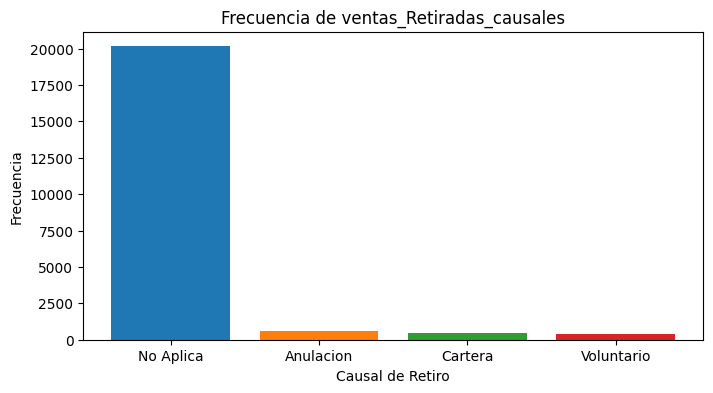

In [238]:
# Contar la frecuencia de cada categoría en la columna "ventas_Retiradas_causales"
frecuencia_ventas_retiradas = df["ventas_Retiradas_causales"].value_counts()

# Lista de colores personalizada
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear un gráfico de barras para la frecuencia de "ventas_Retiradas_causales"
plt.figure(figsize=(8, 4))
plt.bar(frecuencia_ventas_retiradas.index, frecuencia_ventas_retiradas.values, color=colors)
plt.title("Frecuencia de ventas_Retiradas_causales")
plt.xlabel("Causal de Retiro")
plt.ylabel("Frecuencia")
plt.show()

***
### Retiro: Normal

In [239]:
#categorias de la variable Retiro
print(df["Retiro"].value_counts())

Retiro
NO    20147
SI     1512
Name: count, dtype: int64


Retiro
NO    93.019068
SI     6.980932
Name: proportion, dtype: float64


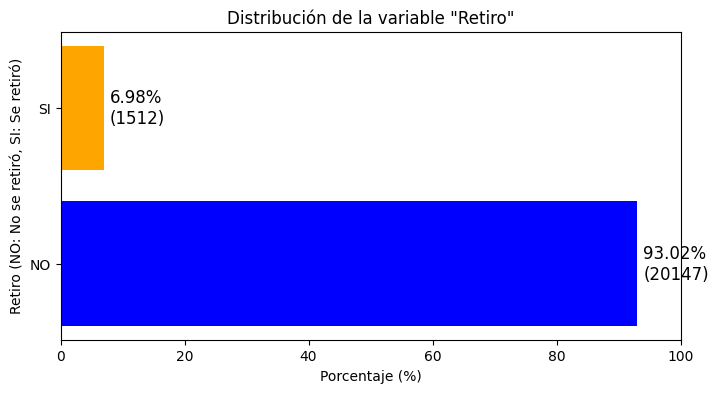

Retiro
NO    20147
SI     1512
Name: count, dtype: int64


In [242]:
# Verificar la distribución de la variable "Retiro"
balance_clases = df['Retiro'].value_counts(normalize=True) * 100
cantidad_retiros = df['Retiro'].value_counts()

# Mostrar los porcentajes de clientes que se retiraron y no se retiraron
print(balance_clases)

# Crear un gráfico de barras horizontales para visualizar la distribución de la variable "Retiro"
plt.figure(figsize=(8, 4))
plt.barh(balance_clases.index.astype(str), balance_clases.values, color=['blue', 'orange'])
plt.ylabel('Retiro (NO: No se retiró, SI: Se retiró)')
plt.xlabel('Porcentaje (%)')
plt.title('Distribución de la variable "Retiro"')
plt.xlim(0, 100)

# Mostrar los valores sobre las barras (porcentaje y cantidad)
for i, (v, c) in enumerate(zip(balance_clases.values, cantidad_retiros.values)):
    plt.text(v + 1, i, f"{v:.2f}%\n({c})", va='center', fontsize=12)

# Mostrar el gráfico
plt.show()

# Mostrar la cantidad de retiros
print(cantidad_retiros)

***
### Comuna: Eliminacion de variable,  Desequilibrio en las categorías, Valores ambiguos (Comuna NR)

In [243]:
#analis de la variable Comuna
print(df["Comuna"].value_counts())

Comuna
Comuna 14                   2563
Comuna 13                   2092
Comuna 16                   1626
Comuna 02                   1577
Comuna 21                   1340
Comuna 19                   1200
Comuna 15                   1156
Comuna 03                    852
Comuna 10                    768
Comuna 06                    742
Comuna NR                    738
Comuna 18                    711
Comuna 17                    684
Comuna 07                    659
Comuna 01                    574
Área de Expansión Urbana     552
Comuna 12                    547
Comuna 08                    536
Comuna 05                    533
Comuna 04                    507
Comuna 11                    499
Comuna 09                    475
Comuna 20                    275
Comuna 22                    150
La Buitrera                  126
NR                            56
Los Andes                     33
El Saladito                   27
Pance                         20
El Hormiguero                 15
Gol

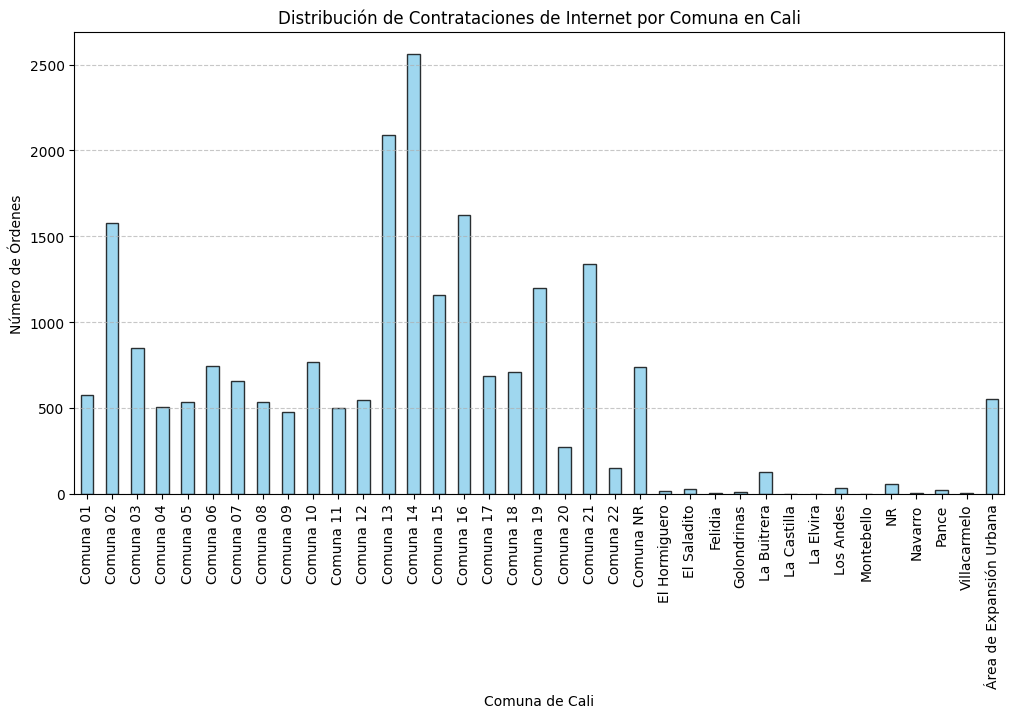

In [246]:
# Contar órdenes por comuna
comuna_orders = df["Comuna"].value_counts().sort_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras de órdenes por comuna
comuna_orders.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.8)
plt.xlabel("Comuna de Cali")
plt.ylabel("Número de Órdenes")
plt.title("Distribución de Contrataciones de Internet por Comuna en Cali")
plt.xticks(rotation=90, ha='center')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

In [253]:
#eliminar la variable Comuna
df = df.drop(columns=["Comuna"])
# Mostrar el DataFrame después de eliminar las columnas
df.shape

(21659, 16)

***
### price_plan: Acotar la variable.

In [247]:
#descripcion de la variable price_plan
df["price_plan"].describe()

count     21659.000000
mean      69177.558188
std       13632.918096
min       41576.000000
25%       61965.000000
50%       66399.000000
75%       70549.000000
max      149999.000000
Name: price_plan, dtype: float64

- Los planes más populares tienden a estar en el rango de velocidad media-alta (100MB - 350MB), lo que sugiere que los clientes buscan un equilibrio entre velocidad y costo.

- Los planes más básicos o más caros (ej. TRIPLE TV + TEL + INTERNET) tienen menor frecuencia de contratación, lo que indica que pueden ser menos atractivos o menos accesibles.

- La gráfica muestra que algunos planes tienen una frecuencia de contratación mucho mayor que otros.

- Los primeros 5 planes concentran la mayor cantidad de ventas, mientras que otros tienen muy pocas contrataciones.

- Esto indica que no hay una distribución uniforme, sino que hay ciertos planes que dominan en la cantidad de las solicitudes.

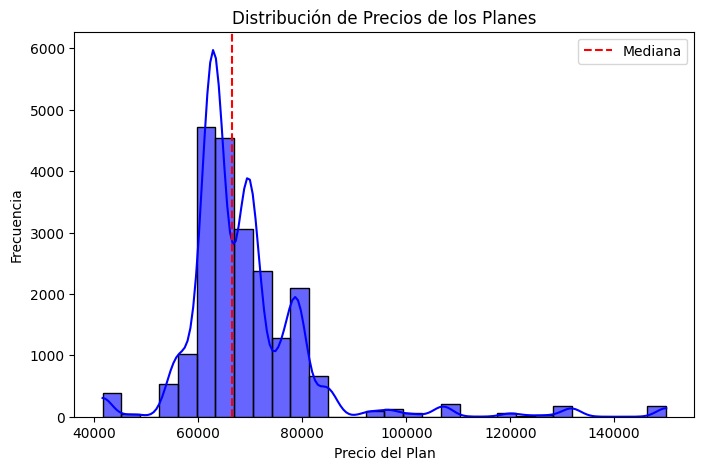

In [248]:
 # Crear un gráfico de distribución (histograma + KDE) para visualizar el sesgo
plt.figure(figsize=(8, 5))
sns.histplot(df['price_plan'], bins=30, kde=True, color='blue', alpha=0.6)
plt.xlabel('Precio del Plan')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de los Planes')

# Línea de la mediana para destacar la asimetría
plt.axvline(df['price_plan'].median(), color='red', linestyle='dashed', label='Mediana')
plt.legend()

# Mostrar gráfico
plt.show()

- No está balanceada. En la gráfica se observa una concentración de precios entre 60,000 y 80,000.

- La distribución es asimétrica hacia la derecha, es decir, la mayoría de los precios están en un rango bajo-medio, pero hay valores más altos que extienden la cola de la distribución.

- La mediana (línea roja discontinua) está desplazada hacia la izquierda, lo que indica que la mayoría de los datos están en el rango bajo-medio.

In [254]:
# Calcular los cuartiles y el IQR
Q1 = df["price_plan"].quantile(0.25)
Q3 = df["price_plan"].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar los registros que están fuera del rango aceptable
registros_fuera = df[(df["price_plan"] < limite_inferior) | (df["price_plan"] > limite_superior)].shape[0]

# Mostrar la cantidad de registros que se quedarían por fuera
print(f"Registros que se quedarían por fuera: {registros_fuera}")

# Filtrar datos dentro del rango aceptable
df_filtrado = df[(df["price_plan"] >= limite_inferior) & (df["price_plan"] <= limite_superior)]

# Mostrar la forma del DataFrame después de filtrar
print(df_filtrado.shape)

Registros que se quedarían por fuera: 1910
(19749, 16)


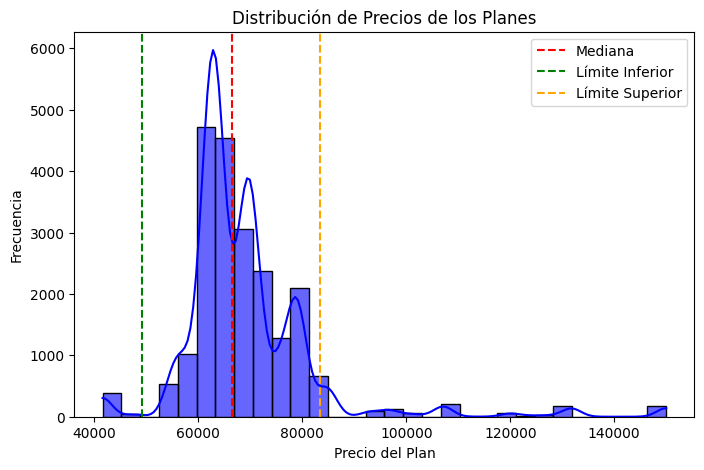

In [255]:
# Crear el gráfico de distribución de precios de los planes
plt.figure(figsize=(8, 5))
sns.histplot(df['price_plan'], bins=30, kde=True, color='blue', alpha=0.6)
plt.xlabel('Precio del Plan')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de los Planes')

# Línea de la mediana para destacar la asimetría
plt.axvline(df['price_plan'].median(), color='red', linestyle='dashed', label='Mediana')

# Líneas de los límites inferior y superior
plt.axvline(limite_inferior, color='green', linestyle='dashed', label='Límite Inferior')
plt.axvline(limite_superior, color='orange', linestyle='dashed', label='Límite Superior')

plt.legend()

# Mostrar gráfico
plt.show()

In [258]:
# Filtrar datos dentro del rango aceptable y reasignar a df
df = df[(df["price_plan"] >= limite_inferior) & (df["price_plan"] <= limite_superior)]

# Mostrar la forma del DataFrame después de filtrar
print(df.shape)

(19749, 16)


In [268]:
# Guardar el DataFrame en un archivo CSV
df.to_csv("./Data/data_sin_nulos_limpia.csv", index=False)

In [265]:
df.shape

(19749, 16)

In [269]:
# 1. ANÁLISIS DE ESTRUCTURA DEL DATAFRAME DESPUÉS DE LIMPIEZA
estructura_df = {
    "Número de Filas": df.shape[0],
    "Número de Columnas": df.shape[1],
    "Tipos de Datos": df.dtypes.value_counts().to_dict(),
    "Valores Nulos por Columna": df.isnull().sum().to_dict()
}

estructura_df

{'Número de Filas': 19749,
 'Número de Columnas': 16,
 'Tipos de Datos': {dtype('O'): 8,
  dtype('int64'): 4,
  dtype('int32'): 2,
  dtype('float64'): 1,
  CategoricalDtype(categories=['18-29', '30-39', '40-49', '50-59', '60-69'], ordered=True, categories_dtype=object): 1},
 'Valores Nulos por Columna': {'is_actived': 0,
  'Genero': 0,
  'Edad': 0,
  'city_owner': 0,
  'estrato': 0,
  'price_plan': 0,
  'nombre_zone': 0,
  'ventas_Retiradas_causales': 0,
  'Retiro': 0,
  'motivo_rechazo_solicitud': 0,
  'mes': 0,
  'dia': 0,
  'venta': 0,
  'grupo_edad': 0,
  'tipo_plan': 0,
  'plan_MB': 0}}

## Reducción y Optimización del Dataset

Se pasó de un dataset con:

- 22,393 registros y 34 columnas
- 15 variables categóricas, 11 numéricas y 6 flotantes
- 2 variables de tipo fecha
- Con valores nulos en varias columnas clave (motivo_is_actived, contract, id_barrios, Comuna).

A un dataset más limpio con:

- 19,749 registros y 16 columnas (reducción del 12% de registros y 53% de columnas).
- Eliminación de valores nulos, asegurando que todas las columnas tengan información válida.
- Conversión y optimización de tipos de datos, incluyendo:
    - Variables categóricas organizadas en grupos (grupo_edad).
    - Variables numéricas más precisas (price_plan sin valores extremos).
    - Variables de fecha transformadas en información relevante (mes, día).
    - Variables indicadoras (venta, Retiro) para facilitar el modelado.

## Manejo de Valores Nulos

- Se eliminaron columnas con más del 90% de valores nulos (causal_anulacion_id, ventas_Retiradas_nombre_causal).
- Se imputaron valores en variables relevantes como price_plan y Comuna.

## Eliminación de Variables Irrelevantes

- Se eliminaron IDs sin valor informativo (id, user_creation_id, id_plan).
- Se consolidaron variables redundantes como is_actived, ventas_Retiradas_causales, y motivo_is_actived en una sola variable de rechazo (motivo_rechazo_solicitud).

## Transformaciones de Variables

- date_creation → Se desglosó en mes y día para permitir análisis temporal.
- Edad → Se agrupó en segmentos (grupo_edad) para simplificar patrones demográficos.
- is_actived → Se transformó en una variable binaria (venta realizada o no).
- plan → Se convirtió en tipo_plan y plan_MB para representar mejor la capacidad del servicio.

## Eliminación de Outliers en price_plan

- Se eliminaron los valores atípicos utilizando rango intercuartílico (IQR), reduciendo la influencia de precios extremos.

***
***
***
***
***

## Balanceo de la variable objetivo Venta (Undersampling)

In [3]:
df = pd.read_csv("./Data/data_sin_nulos_limpia.csv")
#df = pd.read_csv('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/FINAL/Data/data_sin_nulos.csv')

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)


(19749, 16)


In [4]:
# Distribución de la variable objetivo
df["venta"].value_counts()

venta
1    16998
0     2751
Name: count, dtype: int64

In [5]:
df["motivo_rechazo_solicitud"].value_counts()

motivo_rechazo_solicitud
No Aplica                  17162
Financiero                   751
Tiempos y Procesos           598
Otro                         513
Errores en la Solicitud      366
Doble Solicitud              351
Falta de Interés               8
Name: count, dtype: int64

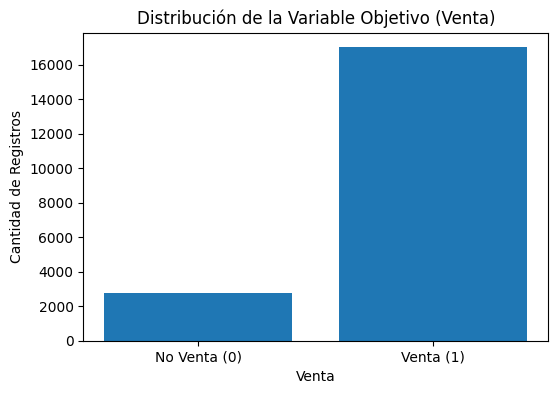

In [6]:
# Distribución de la variable objetivo
venta_counts = df["venta"].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(6, 4))
plt.bar(venta_counts.index, venta_counts.values, tick_label=["No Venta (0)", "Venta (1)"])
plt.xlabel("Venta")
plt.ylabel("Cantidad de Registros")
plt.title("Distribución de la Variable Objetivo (Venta)")
plt.show()

In [7]:
df["Retiro"].value_counts()

Retiro
NO    18326
SI     1423
Name: count, dtype: int64

In [8]:
df["ventas_Retiradas_causales"].value_counts()

ventas_Retiradas_causales
No Aplica     18326
Anulacion       564
Cartera         465
Voluntario      394
Name: count, dtype: int64

In [13]:
# Función para mapear ventas_Retiradas_causales a motivo_rechazo_solicitud
def mapear_causal_retiro(causal):
    if causal == "Cartera":
        return "Financiero"
    elif causal == "Anulacion":
        return "Errores en la Solicitud"
    elif causal == "Voluntario":
        return "Falta de Interés"
    else:
        return "Otro"

# Actualizar la columna "venta": Si venta es 1 y retiro es "SI", cambiarla a 0
df.loc[(df["venta"] == 1) & (df["Retiro"] == "SI"), "venta"] = 0

# Mapear ventas_Retiradas_causales a motivo_rechazo_solicitud donde aplica
df["motivo_rechazo_solicitud"] = df.apply(
    lambda row: mapear_causal_retiro(row["ventas_Retiradas_causales"]) 
    if row["ventas_Retiradas_causales"] != "No Aplica" else row["motivo_rechazo_solicitud"], axis=1
)

# Verificar la nueva distribución de motivo_rechazo_solicitud
motivo_rechazo_counts = df["motivo_rechazo_solicitud"].value_counts()

In [14]:
df["venta"].value_counts()

venta
1    15575
0     4174
Name: count, dtype: int64

In [15]:
df["motivo_rechazo_solicitud"].value_counts()

motivo_rechazo_solicitud
No Aplica                  15739
Financiero                  1216
Errores en la Solicitud      930
Tiempos y Procesos           598
Otro                         513
Falta de Interés             402
Doble Solicitud              351
Name: count, dtype: int64

In [16]:
# Lista de valores posibles para asignar aleatoriamente (excluyendo "No Aplica")
valores_posibles = ["Financiero", "Tiempos y Procesos", "Otro", "Errores en la Solicitud", "Doble Solicitud", "Falta de Interés"]

# Filtrar los registros donde el motivo sigue siendo "No Aplica" pero venta = 0
indices_faltantes = df[(df["venta"] == 0) & (df["motivo_rechazo_solicitud"] == "No Aplica")].index

# Asignar valores aleatorios a los registros faltantes
df.loc[indices_faltantes, "motivo_rechazo_solicitud"] = np.random.choice(valores_posibles, size=len(indices_faltantes), replace=True)

# Verificar la nueva distribución de "motivo_rechazo_solicitud"
df["motivo_rechazo_solicitud"].value_counts()

motivo_rechazo_solicitud
No Aplica                  15575
Financiero                  1244
Errores en la Solicitud      957
Tiempos y Procesos           620
Otro                         540
Falta de Interés             433
Doble Solicitud              380
Name: count, dtype: int64

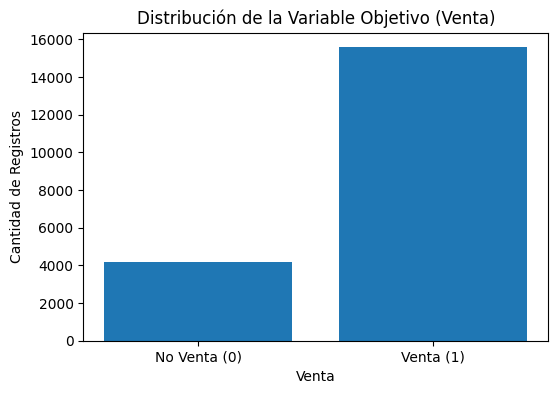

In [17]:
# Distribución de la variable objetivo
venta_counts = df["venta"].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(6, 4))
plt.bar(venta_counts.index, venta_counts.values, tick_label=["No Venta (0)", "Venta (1)"])
plt.xlabel("Venta")
plt.ylabel("Cantidad de Registros")
plt.title("Distribución de la Variable Objetivo (Venta)")
plt.show()

In [18]:
# Obtener el conteo de cada categoría en la variable "venta"
df["venta"].value_counts()

venta
1    15575
0     4174
Name: count, dtype: int64

In [19]:
# Obtener el porcentaje de cada categoría en la variable "venta"
df["venta"].value_counts(normalize=True) * 100

venta
1    78.864753
0    21.135247
Name: proportion, dtype: float64

In [20]:
df.shape

(19749, 16)

In [21]:
# Separar clases mayoritaria y minoritaria
df_majority = df[df["venta"] == 1]
df_minority = df[df["venta"] == 0]


# Calcular la nueva cantidad de registros para la clase mayoritaria (65%-35% balance)
nueva_cantidad_venta_1 = int(len(df_minority) * (65 / 35))  # Ajuste correcto

# Realizar undersampling en la clase mayoritaria
df_majority_under = df_majority.sample(n=nueva_cantidad_venta_1, random_state=42)

# Concatenar ambas clases balanceadas
df_balanced = pd.concat([df_majority_under, df_minority])

# Calcular el porcentaje de pérdida de datos
registros_totales_nuevo = len(df_balanced)
perdida_datos = 100 * (1 - (registros_totales_nuevo / len(df)))

# Verificar la nueva distribución de la variable objetivo
venta_counts_balanced = df_balanced["venta"].value_counts()
print(f"Distribución de la variable 'venta' después de balancear:\n{venta_counts_balanced}")

# Retornar el porcentaje de pérdida de datos
print(f"Porcentaje de pérdida de datos: {perdida_datos:.2f}%")

Distribución de la variable 'venta' después de balancear:
venta
1    7751
0    4174
Name: count, dtype: int64
Porcentaje de pérdida de datos: 39.62%


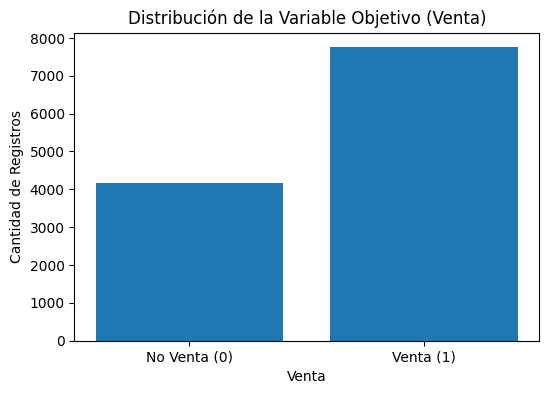

In [22]:
# Distribución de la variable objetivo
venta_counts = df_balanced["venta"].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(6, 4))
plt.bar(venta_counts.index, venta_counts.values, tick_label=["No Venta (0)", "Venta (1)"])
plt.xlabel("Venta")
plt.ylabel("Cantidad de Registros")
plt.title("Distribución de la Variable Objetivo (Venta)")
plt.show()

In [23]:
# Obtener el porcentaje de cada categoría en la variable "venta"
df_balanced["venta"].value_counts(normalize=True) * 100

venta
1    64.997904
0    35.002096
Name: proportion, dtype: float64

In [24]:
df_balanced.shape

(11925, 16)

In [25]:
# Barajar el dataset después de realizar el undersampling
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la nueva distribución de la variable objetivo
df_balanced["venta"].value_counts()

venta
1    7751
0    4174
Name: count, dtype: int64

In [26]:
# 1. ANÁLISIS DE ESTRUCTURA DEL DATAFRAME DESPUÉS DE LIMPIEZA
estructura_df = {
    "Número de Filas": df_balanced.shape[0],
    "Número de Columnas": df_balanced.shape[1],
    "Tipos de Datos": df_balanced.dtypes.value_counts().to_dict(),
    "Valores Nulos por Columna": df_balanced.isnull().sum().to_dict()
}

estructura_df

{'Número de Filas': 11925,
 'Número de Columnas': 16,
 'Tipos de Datos': {dtype('O'): 9, dtype('int64'): 6, dtype('float64'): 1},
 'Valores Nulos por Columna': {'is_actived': 0,
  'Genero': 0,
  'Edad': 0,
  'city_owner': 0,
  'estrato': 0,
  'price_plan': 0,
  'nombre_zone': 0,
  'ventas_Retiradas_causales': 0,
  'Retiro': 0,
  'motivo_rechazo_solicitud': 0,
  'mes': 0,
  'dia': 0,
  'venta': 0,
  'grupo_edad': 0,
  'tipo_plan': 0,
  'plan_MB': 0}}

## Ultima Limpieza de datos

In [27]:
df_balanced.shape

(11925, 16)

***
### eliminacion de variables is_actived y ventas_Retiradas_causales, estas variables se resumen en motivo_rechazo_solicitud

In [28]:
# Mostrar la cantidad de categorias de 'is_actived'
df_balanced["is_actived"].value_counts()

is_actived
Orden creada    9174
Rechazado       2307
Anulado          444
Name: count, dtype: int64

In [29]:
df_balanced["ventas_Retiradas_causales"].value_counts()

ventas_Retiradas_causales
No Aplica     10502
Anulacion       564
Cartera         465
Voluntario      394
Name: count, dtype: int64

In [30]:
df_balanced["motivo_rechazo_solicitud"].value_counts()

motivo_rechazo_solicitud
No Aplica                  7751
Financiero                 1244
Errores en la Solicitud     957
Tiempos y Procesos          620
Otro                        540
Falta de Interés            433
Doble Solicitud             380
Name: count, dtype: int64

In [31]:
#eliminacion de variables is_actived y ventas_Retiradas_causales
df_balanced = df_balanced.drop(columns=["is_actived", "ventas_Retiradas_causales"])
# Mostrar el DataFrame después de eliminar las columnas
df_balanced.shape

(11925, 14)

***
### eliminacion de variable city_owner

In [32]:
df_balanced["city_owner"].value_counts()

city_owner
Cali       11360
Jamundi      404
Yumbo        161
Name: count, dtype: int64

In [33]:
#eliminar la variable city_owner
df_balanced = df_balanced.drop(columns=["city_owner"])
# Mostrar el DataFrame después de eliminar las columnas
df_balanced.shape

(11925, 13)

***
### eliminacion de variable Retiro

In [34]:
df_balanced["Retiro"].value_counts()

Retiro
NO    10502
SI     1423
Name: count, dtype: int64

In [35]:
#eliminar la variable Retiro
df_balanced = df_balanced.drop(columns=["Retiro"])
# Mostrar el DataFrame después de eliminar las columnas
df_balanced.shape

(11925, 12)

***

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_balanced.to_csv("./Data/data_balanceada.csv", index=False)

## conclusiónes:

- El análisis y procesamiento del dataset permitió identificar las principales características demográficas, de producto y comportamiento temporal asociadas a las ventas en el portal. Se trabajó sobre un conjunto de datos con más de 22 mil registros, en el cual se detectaron variables clave como el tipo y precio del plan, edad, estrato socioeconómico y zona.

- Durante la limpieza, se evidenció una considerable presencia de datos nulos en variables relacionadas con retiros y anulaciones, lo cual sugiere la necesidad de un mejor seguimiento o recolección en estos campos. Se logró categorizar y segmentar adecuadamente las variables para facilitar análisis posteriores, como modelamiento predictivo o segmentación de clientes.

- El análisis inicial también permitió establecer que existen patrones temporales (mes, día de la semana) y que la mayoría de los usuarios se concentran en ciertas ciudades (ej. Cali), lo cual podría tener implicaciones en la estrategia comercial. Esta limpieza y estructuración del dataset sienta las bases para exploraciones más profundas, como modelos de retención, segmentación de clientes o análisis de causas de cancelación.